<a href="https://colab.research.google.com/github/pareen-harsora/Predictive-Analytics-for-optimal-cannabis-store-location/blob/main/BAN210_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Predictive Analytics**

## **Final Project**


 Pareen Harsora
 (Student ID: 112515226)


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
# Importing development file
data = pd.read_csv(r'C:\Users\pareen\Documents\BAN 210\ban210dev1.csv')
data.head()

,PRCDDA,PRIZM5DA,SG,LS,DensityClusterCode15,DensityClusterCode5,DensityClusterCode5_lbl,DEPVAR7,TOT__SPENT7,ECYBASHPOP,...,SV00070,SV00074,SV00077,SV00079,SV00271,SV00086,SV00091,SV00093,DensityClusterCode15_2,SG_U2
0,35180018,24,E2,F3,4,3,Exurban,16.90,19979.65,1643,...,20.121401,29.906413,25.941500,18.698091,25.550912,26.812864,24.426433,22.872993,0,0
1,35180025,36,E2,F5,7,2,Suburban,12.59,5501.30,540,...,20.306296,31.806742,27.147017,21.777828,22.963944,25.801742,24.209429,25.637639,0,0
2,35180035,09,E1,F8,4,3,Exurban,8.54,8663.24,1278,...,22.899473,29.776518,28.016269,22.289640,27.420563,24.962959,22.953193,24.937105,0,0
3,35180356,15,S3,F3,3,2,Suburban,10.18,8609.31,1150,...,24.120943,34.639647,22.705485,26.671048,28.461166,30.945115,18.325738,29.869398,0,0
4,35180358,14,S3,F9,3,2,Suburban,11.39,10355.18,1155,...,21.565057,30.620935,23.169136,21.199359,25.400404,27.710327,24.416933,24.958049,0,0


In [ ]:
# Basic stats of target variable
# 008 - Spent [Pst Mth] - Cannabis - Consumption ($/mth) Per Person Aged 19+
target_variable = data['DEPVAR7']
target = 'DEPVAR7'

# Calculate basic statistics
mean_value = target_variable.mean()
median_value = target_variable.median()
standard_deviation = target_variable.std()
minimum_value = target_variable.min()
maximum_value = target_variable.max()

# Printing stats
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", standard_deviation)
print("Minimum:", minimum_value)
print("Maximum:", maximum_value)

Mean: 11.294506931729007
Median: 9.96
Standard Deviation: 5.783302899232551
Minimum: 0.0
Maximum: 33.92


In [ ]:
# Basic Stats of Independent Variable 1
# 040 - Unemployment Rate
indVar1 = data['ECYACTUR']

# Calculate basic statistics
mean_value1 = indVar1.mean()
median_value1 = indVar1.median()
standard_deviation1 = indVar1.std()
minimum_value1 = indVar1.min()
maximum_value1 = indVar1.max()

# Printing stats
print("Mean:", mean_value1)
print("Median:", median_value1)
print("Standard Deviation:", standard_deviation1)
print("Minimum:", minimum_value1)
print("Maximum:", maximum_value1)

Mean: 6.538869997384253
Median: 6.2
Standard Deviation: 2.5304210820602537
Minimum: 0.0
Maximum: 25.2


In [ ]:
## Basic Stats of Independent Variable  2
# 153 - Social Value - Social Darwinism
indVar2 = data['SV00271']
# Calculate basic statistics
mean_value2 = indVar2.mean()
median_value2 = indVar2.median()
standard_deviation2 = indVar2.std()
minimum_value2 = indVar2.min()
maximum_value2 = indVar2.max()

# Printing stats
print("Mean:", mean_value1)
print("Median:", median_value1)
print("Standard Deviation:", standard_deviation1)
print("Minimum:", minimum_value1)
print("Maximum:", maximum_value1)

Mean: 6.538869997384253
Median: 6.2
Standard Deviation: 2.5304210820602537
Minimum: 0.0
Maximum: 25.2


In [ ]:
# Basic Stats of Independent Variable 3
# 123 - Spent on - Other tobacco products and smokers' supplies
indVar3 = data['HSTA002B']

# Calculate basic statistics
mean_value3 = indVar3.mean()
median_value3 = indVar3.median()
standard_deviation3 = indVar3.std()
minimum_value3 = indVar3.min()
maximum_value3 = indVar3.max()

# Printing stats
print("Mean:", mean_value3)
print("Median:", median_value3)
print("Standard Deviation:", standard_deviation3)
print("Minimum:", minimum_value3)
print("Maximum:", maximum_value3)

Mean: 1.738103791001831
Median: 1.317343
Standard Deviation: 1.367834928392954
Minimum: 0.0
Maximum: 8.70352


In [ ]:
# Basic Stats of Independent Variable 4
# 076 - WealthScapes Net Worth - Value
indVar4 = data['WSWORTHV']

# Calculate basic statistics
mean_value4 = indVar4.mean()
median_value4 = indVar4.median()
standard_deviation4 = indVar4.std()
minimum_value4 = indVar4.min()
maximum_value4 = indVar4.max()

# Printing stats
print("Mean:", mean_value4)
print("Median:", median_value4)
print("Standard Deviation:", standard_deviation4)
print("Minimum:", minimum_value4)
print("Maximum:", maximum_value4)

Mean: 1210874.154956006
Median: 921522.2349
Standard Deviation: 1111168.458623816
Minimum: -1722.07893
Maximum: 12099542.53


In [ ]:
# Basic Stats of Independent Variable 5
# 078 - Debt:Asset Ratio
indVar5 = data['WSD2AR']

# Calculate basic statistics
mean_value5 = indVar5.mean()
median_value5 = indVar5.median()
standard_deviation5 = indVar5.std()
minimum_value5 = indVar5.min()
maximum_value5 = indVar5.max()

# Printing stats
print("Mean:", mean_value5)
print("Median:", median_value5)
print("Standard Deviation:", standard_deviation5)
print("Minimum:", minimum_value5)
print("Maximum:", maximum_value5)

Mean: 0.18862558200366203
Median: 0.1774
Standard Deviation: 0.08109290176979964
Minimum: 0.0
Maximum: 1.0587


In [ ]:
# A random sample of 10 records from analytical file
random_sample = data.sample(n=10)

random_sample.head(n=10)

,PRCDDA,PRIZM5DA,SG,LS,DensityClusterCode15,DensityClusterCode5,DensityClusterCode5_lbl,DEPVAR7,TOT__SPENT7,ECYBASHPOP,...,SV00070,SV00074,SV00077,SV00079,SV00271,SV00086,SV00091,SV00093,DensityClusterCode15_2,SG_U2
2854,35210430,06,S1,F8,3,2,Suburban,9.71,4146.11,520,...,23.590333,36.487870,28.975593,20.785318,27.950594,28.874008,22.539724,25.198880,0,0
1871,35202998,28,U2,M1,2,1,Urban,3.27,1416.42,524,...,25.279013,37.719911,25.848409,20.038554,31.261554,34.448116,25.223524,25.975133,1,1
2841,35210401,01,U1,F8,3,2,Suburban,4.26,1812.42,572,...,31.062473,28.624652,23.072922,20.199089,25.549385,23.663036,19.877851,25.943224,0,0
2309,35204118,31,U4,F1,2,1,Urban,7.42,17356.70,2879,...,23.914371,29.507273,29.883468,27.342424,24.988729,31.786982,19.944744,25.399817,1,0
1780,35202687,12,U3,Y2,2,1,Urban,13.49,5585.57,523,...,35.044306,23.670809,24.532015,23.097606,24.192404,23.062665,22.999830,22.563470,1,0
1124,35200941,27,U2,F9,2,1,Urban,7.82,2658.11,390,...,27.149252,29.843579,31.364768,23.456942,25.307517,31.939881,19.713024,28.676309,1,1
1744,35202598,05,U2,F9,2,1,Urban,4.33,1233.01,378,...,29.166780,31.766937,25.615521,23.786785,31.565618,31.039758,18.924253,24.694794,1,1
2067,35203479,27,U2,F9,2,1,Urban,8.22,2916.80,446,...,24.800550,32.791670,31.510459,22.209261,25.496299,33.424994,19.507652,29.216878,1,1
297,35190282,31,U4,F1,2,1,Urban,7.29,38307.55,6069,...,22.632860,27.609662,30.568923,31.067452,21.414859,29.932829,20.467076,21.474664,1,0
2869,35210474,05,U2,F9,2,1,Urban,4.11,1602.77,498,...,32.590900,28.222865,25.007620,30.830100,34.963151,27.426336,11.760702,24.858918,1,1


In [ ]:
# Run correlations of all variables in the analytical file with Target variable
correlations = data.corrwith(target_variable)

# Display the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

for col, correlation in sorted_correlations.items():
    print(f"{col}: {correlation:.4f}")

C:\Users\ksmakker\AppData\Local\Temp\ipykernel_34896\3986686220.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corrwith(target_variable)


DEPVAR7: 1.0000
HSRE011: 0.6792
HSRE040: 0.6280
HSED006: 0.5166
WSD2AR: 0.4974
TOT__SPENT7: 0.4894
HSRE061: 0.4719
SV00041: 0.4484
ECYMARSING: 0.4406
HSCM001D: 0.4310
SV00044: 0.4143
ECYMTN2534: 0.4060
ECYHTA3034: 0.3970
ECYHTA2529: 0.3889
SV00066: 0.3874
HSCS007: 0.3766
HSSH037B: 0.3688
HSTA002A: 0.3673
HSTR050: 0.3620
ECYTIMSA: 0.3595
SV00030: 0.3531
SV00093: 0.3442
HSCS013: 0.3352
ECYMTN3544: 0.3027
ECYHOMPANJ: 0.3015
HSCS008: 0.3003
ECYSTYAPT: 0.2805
SV00043: 0.2714
HSRE021: 0.2679
CNBBAS1934: 0.2673
ECYCFSLP: 0.2659
SV00061: 0.2654
SV00086: 0.2549
HSHC003: 0.2337
SV00058: 0.2326
ECYTRAWALK: 0.2312
ECYMARCL: 0.2210
ECYACTINLF: 0.2118
HSTA002B: 0.2083
ECYOCCSCND: 0.2004
SV00038: 0.1997
SV00028: 0.1954
SV00011: 0.1912
ECYACTUR: 0.1769
ECYSTYAPU5: 0.1739
HSHC004B: 0.1689
HSTA001S: 0.1663
ECYHSZ1PER: 0.1638
ECYBASHPOP: 0.1634
CNBBAS19P: 0.1563
SV00025: 0.1556
ECYCHAKIDS: 0.1519
SV00023: 0.1483
SV00079: 0.1477
ECYINDADMN: 0.1473
ECYTRABIKE: 0.1452
ECYEDUHSCE: 0.1369
SV00037: 0.1353
HSTR

In [ ]:
# Counting variables with correlations
sorted_correlations.count()

158

In [ ]:
# Function to calculate the bootstrapped correlation, confidence intervals, and significance
def bootstrap_corr_significance(data, target_variable, num_iterations=1000, ci=95):
    correlations = data.corrwith(target_variable)
    sorted_correlations = correlations.sort_values(ascending=False)

    # Initialize empty lists to store significance, bootstrapped samples, and correlation p-values
    significance_values = []
    bootstrapped_samples = []
    p_values = []

    # Perform bootstrapping and calculate correlation for each iteration
    for col in sorted_correlations.index:
        values = data[col]
        bootstrapped_corr = []
        for _ in range(num_iterations):
            resampled_values = np.random.choice(values, size=len(values), replace=True)
            corr = np.corrcoef(resampled_values, target_variable)[0, 1]
            bootstrapped_corr.append(corr)

        # Calculate p-value for the correlation
        p_value = np.mean(np.array(bootstrapped_corr) >= 0)
        p_values.append(p_value)
        bootstrapped_samples.append(bootstrapped_corr)

    # Calculate confidence intervals
    ci_lower = (100 - ci) / 2
    ci_upper = 100 - ci_lower
    confidence_intervals = np.percentile(bootstrapped_samples, [ci_lower, ci_upper], axis=1)

    # Calculate significance percentage
    significance_percentages = np.array(p_values) * 100

    # Create a DataFrame to store results
    result_df = pd.DataFrame({
        "Variable": sorted_correlations.index,
        "Correlation": sorted_correlations,
        f"{ci}% CI Lower": confidence_intervals[0],
        f"{ci}% CI Upper": confidence_intervals[1],
        "Significance Percentage": significance_percentages
    })

    return result_df

# Call the function to get correlation with confidence intervals and significance
result_df = bootstrap_corr_significance(data, target_variable)

# Display the results in descending order of significance
result_df.sort_values(by="Significance Percentage", ascending=False, inplace=True)

# Convert the correlation values to percentage for better readability
result_df["Correlation"] *= 100

# Display the results
print(result_df)

C:\Users\ksmakker\AppData\Local\Temp\ipykernel_34896\2808131577.py:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corrwith(target_variable)


              Variable  Correlation  95% CI Lower  95% CI Upper  \
HSRE011        HSRE011    67.924594     -0.028795      0.033052   
ECYSTYSEMI  ECYSTYSEMI    11.092632     -0.029230      0.031687   
HSHE012        HSHE012    -1.486374     -0.031704      0.033198   
ECYHTA6064  ECYHTA6064   -40.825907     -0.029836      0.032285   
HSRE006        HSRE006     0.532804     -0.030858      0.031798   
...                ...          ...           ...           ...   
WSWORTHV      WSWORTHV   -35.729613     -0.031325      0.030955   
HSTR058        HSTR058    13.198960     -0.031358      0.030287   
HSHC001        HSHC001     1.661183     -0.030640      0.029165   
SV00064        SV00064     4.932732     -0.033672      0.030969   
ECYPOWOSCA  ECYPOWOSCA    -1.713497     -0.029603      0.034767   

            Significance Percentage  
HSRE011                        55.8  
ECYSTYSEMI                     53.1  
HSHE012                        53.0  
ECYHTA6064                     52.7  
HSRE0

In [ ]:
!pip install mlxtend

In [ ]:
# Preprocessing - drop non-numeric columns
data = data.select_dtypes(include=[np.number])

# Preprocessing - handle missing values
data = data.dropna()

# Select the first 20 features and the target variable.
X = data.iloc[:, :40]  # Features
Y = target_variable  # Target variable

# Add a constant to the independent value
X_1 = sm.add_constant(X)

# Function to perform backward elimination
def backward_elimination(X, Y, significance_level=0.01):
    numVars = X.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, X).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > significance_level:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    X = X.drop(X.columns[j], axis=1)
    return X

# Function to perform forward selection
def forward_selection(X, Y, significance_level=0.01):
    selected_features = []
    numVars = X.shape[1]
    for i in range(0, numVars):
        remaining_features = [feature for feature in X.columns if feature not in selected_features]
        p_values = []
        for feature in remaining_features:
            model_features = selected_features + [feature]
            X_temp = X[model_features]
            X_temp = sm.add_constant(X_temp)
            regressor_OLS = sm.OLS(Y, X_temp).fit()
            p_values.append((feature, regressor_OLS.pvalues[-1]))
        min_p_value = min(p_values, key=lambda x: x[1])
        if min_p_value[1] <= significance_level:
            selected_features.append(min_p_value[0])
        else:
            break
    return X[selected_features]

# Perform backward elimination
data_modeled_backward = backward_elimination(X_1, Y)

# Perform forward selection
data_modeled_forward = forward_selection(X, Y)

# Combine the selected features from both methods
final_selected_features = list(set(data_modeled_backward.columns) | set(data_modeled_forward.columns))

# Display the final set of selected features
print("Final selected features after applying both backward and forward stepwise selection:")
print(final_selected_features)

Final selected features after applying both backward and forward stepwise selection:
['DEPVAR7', 'ECYTENOWN', 'ECYPOC17P', 'CNBBAS1934', 'ECYCHAKIDS', 'TOT__SPENT7', 'CNBBAS19P', 'CNBBAS35P', 'DensityClusterCode5']


In [ ]:
BucketList = []
BucketList.extend(final_selected_features)

In [ ]:
print(BucketList)

['DEPVAR7', 'ECYTENOWN', 'ECYPOC17P', 'CNBBAS1934', 'ECYCHAKIDS', 'TOT__SPENT7', 'CNBBAS19P', 'CNBBAS35P', 'DensityClusterCode5']


In [ ]:
# Preprocessing - drop non-numeric columns
data = data.select_dtypes(include=[np.number])

# Preprocessing - handle missing values
data = data.dropna()

# Select the first 20 features and the target variable.
X = data.iloc[:, 40:80]  # Features
Y = target_variable  # Target variable

# Add a constant to the independent value
X_1 = sm.add_constant(X)

# Function to perform backward elimination
def backward_elimination(X, Y, significance_level=0.01):
    numVars = X.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, X).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > significance_level:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    X = X.drop(X.columns[j], axis=1)
    return X

# Function to perform forward selection
def forward_selection(X, Y, significance_level=0.01):
    selected_features = []
    numVars = X.shape[1]
    for i in range(0, numVars):
        remaining_features = [feature for feature in X.columns if feature not in selected_features]
        p_values = []
        for feature in remaining_features:
            model_features = selected_features + [feature]
            X_temp = X[model_features]
            X_temp = sm.add_constant(X_temp)
            regressor_OLS = sm.OLS(Y, X_temp).fit()
            p_values.append((feature, regressor_OLS.pvalues[-1]))
        min_p_value = min(p_values, key=lambda x: x[1])
        if min_p_value[1] <= significance_level:
            selected_features.append(min_p_value[0])
        else:
            break
    return X[selected_features]

# Perform backward elimination
data_modeled_backward = backward_elimination(X_1, Y)

# Perform forward selection
data_modeled_forward = forward_selection(X, Y)

# Combine the selected features from both methods
final_selected_features = list(set(data_modeled_backward.columns) | set(data_modeled_forward.columns))

# Display the final set of selected features
print("Final selected features after applying both backward and forward stepwise selection:")
print(final_selected_features)

Final selected features after applying both backward and forward stepwise selection:
['ECYINDPUBL', 'WSCARDSB', 'HSHC001S', 'ECYTRAPSGR', 'ECYHOMFREN', 'ECYTRAPUBL', 'ECYRELCATH', 'WSWORTHV', 'HSTA001S', 'ECYTIMSA', 'ECYTRADRIV', 'HSRE001S', 'ECYINDADMN', 'ECYTRAWALK', 'WSD2AR', 'ECYHOMPANJ', 'WSIN100_P', 'ECYPIMNI', 'ECYTRABIKE']


In [ ]:
BucketList.extend(final_selected_features)
print(BucketList)

['DEPVAR7', 'ECYTENOWN', 'ECYPOC17P', 'CNBBAS1934', 'ECYCHAKIDS', 'TOT__SPENT7', 'CNBBAS19P', 'CNBBAS35P', 'DensityClusterCode5', 'ECYINDPUBL', 'WSCARDSB', 'HSHC001S', 'ECYTRAPSGR', 'ECYHOMFREN', 'ECYTRAPUBL', 'ECYRELCATH', 'WSWORTHV', 'HSTA001S', 'ECYTIMSA', 'ECYTRADRIV', 'HSRE001S', 'ECYINDADMN', 'ECYTRAWALK', 'WSD2AR', 'ECYHOMPANJ', 'WSIN100_P', 'ECYPIMNI', 'ECYTRABIKE']


In [ ]:
# Preprocessing - drop non-numeric columns
data = data.select_dtypes(include=[np.number])

# Preprocessing - handle missing values
data = data.dropna()

# Select the first 20 features and the target variable.
X = data.iloc[:, 80:120]  # Features
Y = target_variable  # Target variable

# Add a constant to the independent value
X_1 = sm.add_constant(X)

# Function to perform backward elimination
def backward_elimination(X, Y, significance_level=0.01):
    numVars = X.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, X).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > significance_level:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    X = X.drop(X.columns[j], axis=1)
    return X

# Function to perform forward selection
def forward_selection(X, Y, significance_level=0.01):
    selected_features = []
    numVars = X.shape[1]
    for i in range(0, numVars):
        remaining_features = [feature for feature in X.columns if feature not in selected_features]
        p_values = []
        for feature in remaining_features:
            model_features = selected_features + [feature]
            X_temp = X[model_features]
            X_temp = sm.add_constant(X_temp)
            regressor_OLS = sm.OLS(Y, X_temp).fit()
            p_values.append((feature, regressor_OLS.pvalues[-1]))
        min_p_value = min(p_values, key=lambda x: x[1])
        if min_p_value[1] <= significance_level:
            selected_features.append(min_p_value[0])
        else:
            break
    return X[selected_features]

# Perform backward elimination
data_modeled_backward = backward_elimination(X_1, Y)

# Perform forward selection
data_modeled_forward = forward_selection(X, Y)

# Combine the selected features from both methods
final_selected_features = list(set(data_modeled_backward.columns) | set(data_modeled_forward.columns))

# Display the final set of selected features
print("Final selected features after applying both backward and forward stepwise selection:")
print(final_selected_features)

Final selected features after applying both backward and forward stepwise selection:
['HSHC003', 'HSRO002', 'HSSH037B', 'HSCL011', 'HSSH011', 'HSHC004B', 'HSRE052', 'HSCM001D', 'HSRE063', 'HSRE006', 'HSRM014', 'HSCS007', 'HSCS013', 'HSRE011', 'HSRE021', 'HSED005', 'HSRE040', 'HSFD991', 'HSTR058', 'HSHC002', 'HSCL001', 'HSSH014', 'const', 'HSHC007', 'HSRE042', 'HSTR034', 'HSRE061', 'HSFD990', 'HSRV001B', 'HSED006', 'HSSH037A', 'HSCM001F', 'HSHC001', 'HSCS008']


In [ ]:
BucketList.extend(final_selected_features)
print(BucketList)

['DEPVAR7', 'ECYTENOWN', 'ECYPOC17P', 'CNBBAS1934', 'ECYCHAKIDS', 'TOT__SPENT7', 'CNBBAS19P', 'CNBBAS35P', 'DensityClusterCode5', 'ECYINDPUBL', 'WSCARDSB', 'HSHC001S', 'ECYTRAPSGR', 'ECYHOMFREN', 'ECYTRAPUBL', 'ECYRELCATH', 'WSWORTHV', 'HSTA001S', 'ECYTIMSA', 'ECYTRADRIV', 'HSRE001S', 'ECYINDADMN', 'ECYTRAWALK', 'WSD2AR', 'ECYHOMPANJ', 'WSIN100_P', 'ECYPIMNI', 'ECYTRABIKE', 'HSHC003', 'HSRO002', 'HSSH037B', 'HSCL011', 'HSSH011', 'HSHC004B', 'HSRE052', 'HSCM001D', 'HSRE063', 'HSRE006', 'HSRM014', 'HSCS007', 'HSCS013', 'HSRE011', 'HSRE021', 'HSED005', 'HSRE040', 'HSFD991', 'HSTR058', 'HSHC002', 'HSCL001', 'HSSH014', 'const', 'HSHC007', 'HSRE042', 'HSTR034', 'HSRE061', 'HSFD990', 'HSRV001B', 'HSED006', 'HSSH037A', 'HSCM001F', 'HSHC001', 'HSCS008']


In [ ]:
# Preprocessing - drop non-numeric columns
data = data.select_dtypes(include=[np.number])

# Preprocessing - handle missing values
data = data.dropna()

# Select the first 20 features and the target variable.
X = data.iloc[:, 120:]  # Features
Y = target_variable  # Target variable

# Add a constant to the independent value
X_1 = sm.add_constant(X)

# Function to perform backward elimination
def backward_elimination(X, Y, significance_level=0.01):
    numVars = X.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, X).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > significance_level:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    X = X.drop(X.columns[j], axis=1)
    return X

# Function to perform forward selection
def forward_selection(X, Y, significance_level=0.01):
    selected_features = []
    numVars = X.shape[1]
    for i in range(0, numVars):
        remaining_features = [feature for feature in X.columns if feature not in selected_features]
        p_values = []
        for feature in remaining_features:
            model_features = selected_features + [feature]
            X_temp = X[model_features]
            X_temp = sm.add_constant(X_temp)
            regressor_OLS = sm.OLS(Y, X_temp).fit()
            p_values.append((feature, regressor_OLS.pvalues[-1]))
        min_p_value = min(p_values, key=lambda x: x[1])
        if min_p_value[1] <= significance_level:
            selected_features.append(min_p_value[0])
        else:
            break
    return X[selected_features]

# Perform backward elimination
data_modeled_backward = backward_elimination(X_1, Y)

# Perform forward selection
data_modeled_forward = forward_selection(X, Y)

# Combine the selected features from both methods
final_selected_features = list(set(data_modeled_backward.columns) | set(data_modeled_forward.columns))

# Display the final set of selected features
print("Final selected features after applying both backward and forward stepwise selection:")
print(final_selected_features)

Final selected features after applying both backward and forward stepwise selection:
['HSGC001', 'SV00061', 'SV00021', 'SV00005', 'HSTA006', 'SV00002', 'SV00028', 'SV00037', 'SV00079', 'SV00035', 'SV00044', 'SV00064', 'SV00036', 'SV00012', 'HSTA002A', 'SV00070', 'HSTA002B', 'SV00086', 'SV00038', 'SG_U2', 'SV00074', 'SV00077', 'SV00043', 'SV00066', 'SV00091', 'SV00041', 'SV00029', 'SV00058', 'SV00011', 'SV00030', 'SV00023', 'SV00093', 'HSTA005', 'SV00025']


In [ ]:
BucketList.extend(final_selected_features)
print(BucketList)

['DEPVAR7', 'ECYTENOWN', 'ECYPOC17P', 'CNBBAS1934', 'ECYCHAKIDS', 'TOT__SPENT7', 'CNBBAS19P', 'CNBBAS35P', 'DensityClusterCode5', 'ECYINDPUBL', 'WSCARDSB', 'HSHC001S', 'ECYTRAPSGR', 'ECYHOMFREN', 'ECYTRAPUBL', 'ECYRELCATH', 'WSWORTHV', 'HSTA001S', 'ECYTIMSA', 'ECYTRADRIV', 'HSRE001S', 'ECYINDADMN', 'ECYTRAWALK', 'WSD2AR', 'ECYHOMPANJ', 'WSIN100_P', 'ECYPIMNI', 'ECYTRABIKE', 'HSHC003', 'HSRO002', 'HSSH037B', 'HSCL011', 'HSSH011', 'HSHC004B', 'HSRE052', 'HSCM001D', 'HSRE063', 'HSRE006', 'HSRM014', 'HSCS007', 'HSCS013', 'HSRE011', 'HSRE021', 'HSED005', 'HSRE040', 'HSFD991', 'HSTR058', 'HSHC002', 'HSCL001', 'HSSH014', 'const', 'HSHC007', 'HSRE042', 'HSTR034', 'HSRE061', 'HSFD990', 'HSRV001B', 'HSED006', 'HSSH037A', 'HSCM001F', 'HSHC001', 'HSCS008', 'HSGC001', 'SV00061', 'SV00021', 'SV00005', 'HSTA006', 'SV00002', 'SV00028', 'SV00037', 'SV00079', 'SV00035', 'SV00044', 'SV00064', 'SV00036', 'SV00012', 'HSTA002A', 'SV00070', 'HSTA002B', 'SV00086', 'SV00038', 'SG_U2', 'SV00074', 'SV00077', 'SV

In [ ]:
len(BucketList)

96

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
import statsmodels.api as sm

# Check if 'const' is present in BucketList and remove it if found
if 'const' in BucketList:
    BucketList.remove('const')

# Create a new DataFrame containing the features from the BucketList
X_bucket = data[BucketList]

# Define the target variable
Y = target_variable

# Initialize the linear regression model
lr = LinearRegression()

# Define the stepwise feature selection using forward and backward elimination
sfs = SequentialFeatureSelector(estimator=lr,
                                k_features=14,
                                forward=True,
                                floating=False,
                                scoring='neg_mean_squared_error',
                                cv=5)

# Fit the stepwise feature selection on the data
sfs = sfs.fit(X_bucket, Y)

# Print the selected features
selected_features = X_bucket.columns[list(sfs.k_feature_idx_)]
print("Final 14 selected features:")
print(selected_features)

Final 14 selected features:
Index(['DEPVAR7', 'ECYTRAPUBL', 'ECYRELCATH', 'HSRE001S', 'HSCM001D',
       'HSCS007', 'HSRE040', 'HSFD990', 'HSCS008', 'SV00061', 'HSTA006',
       'SV00035', 'SG_U2', 'SV00023'],
      dtype='object')


In [ ]:
Final_Bucket_List = ['HSTA001S', 'ECYRELCATH', 'ECYTRAPSGR', 'ECYTIMSAM', 'HSRE001S', 'WSIN100_P',
              'HSRM014', 'HSHC004B', 'HSRE040', 'HSRE006', 'SV00025', 'SV00061', 'SV00035']

In [ ]:
label_dict = {
    'DEPVAR7' : 'Spent on Cannabis ($/month)',
    'HSTA001S': 'Spent on - Tobacco products and alcoholic beverages',
    'ECYRELCATH': 'Religion - Catholic',
    'ECYTRAPSGR': 'Travel To Work By Car As Passenger',
    'ECYTIMSAM': 'Immigrant Place of Birth - South America',
    'HSRE001S': 'Spent on - Recreation',
    'WSIN100_P': 'Households with Income $100,000 Or Over',
    'HSRM014': 'Spent on - Home security devices',
    'HSHC004B': 'Spent on - Other medicines and pharmaceutical products',
    'HSRE040': 'Spent on - Home entertainment equipment and services',
    'HSRE006': 'Spent on - Video game systems and accessories (excluding for computers)',
    'SV00025': 'Social Value - Ecological Lifestyle',
    'SV00061': 'Social Value - Personal Creativity',
    'SV00035': 'Social Value - Flexible Families'
}


           DEPVAR7     HSTA001S   ECYRELCATH   ECYTRAPSGR    ECYTIMSAM  \
count  3823.000000  3823.000000  3823.000000  3823.000000  3823.000000   
mean     11.294507     3.501889    31.384886     2.964597     2.408161   
std       5.783303     0.940520    16.710426     2.897186     3.735928   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       7.440000     2.905035    19.256787     0.937427     0.000000   
50%       9.960000     3.427946    28.765957     1.951220     0.975610   
75%      14.500000     4.013377    40.826719     4.272934     3.160386   
max      33.920000     6.747631    96.755725    22.663551    34.210526   

          HSRE001S    WSIN100_P      HSRM014     HSHC004B      HSRE040  \
count  3823.000000  3823.000000  3823.000000  3823.000000  3823.000000   
mean      4.849749    40.667782     0.011898    14.171512    10.800617   
std       0.773703    19.085625     0.032221     3.656927     3.296637   
min       0.000000     0.000000     0

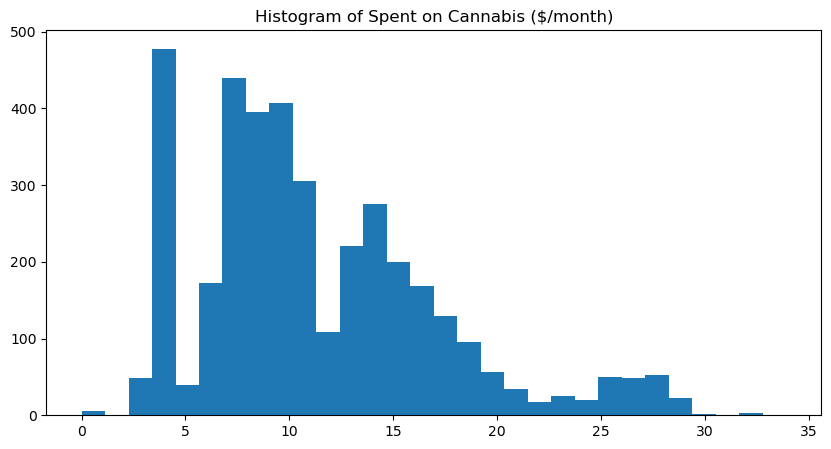

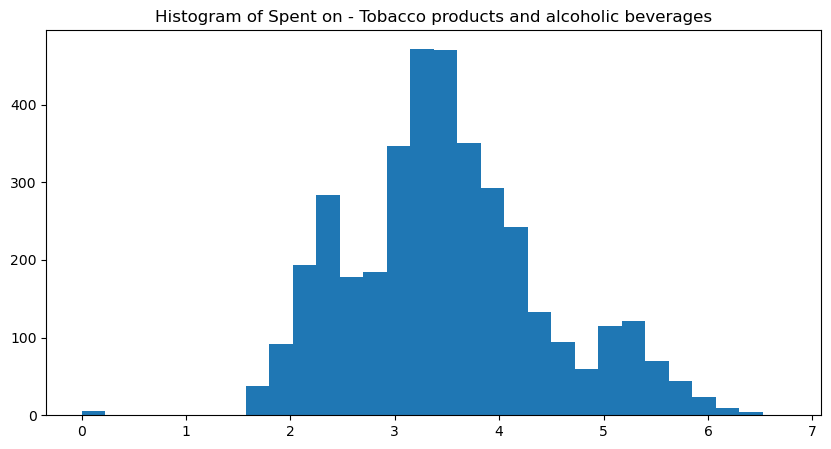

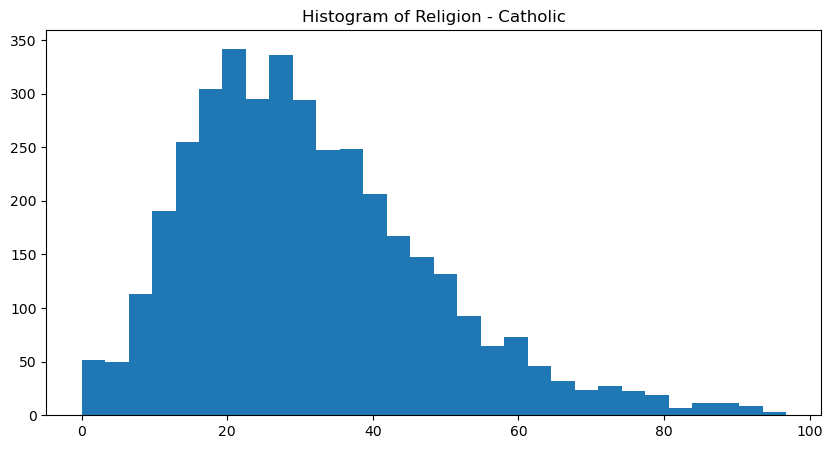

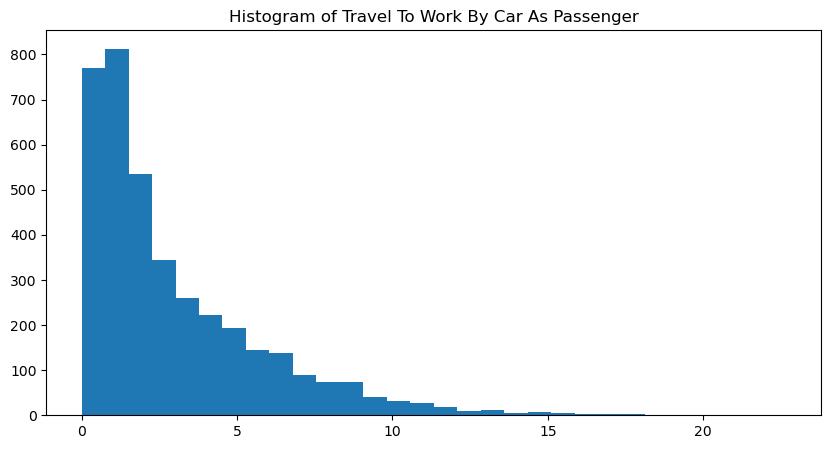

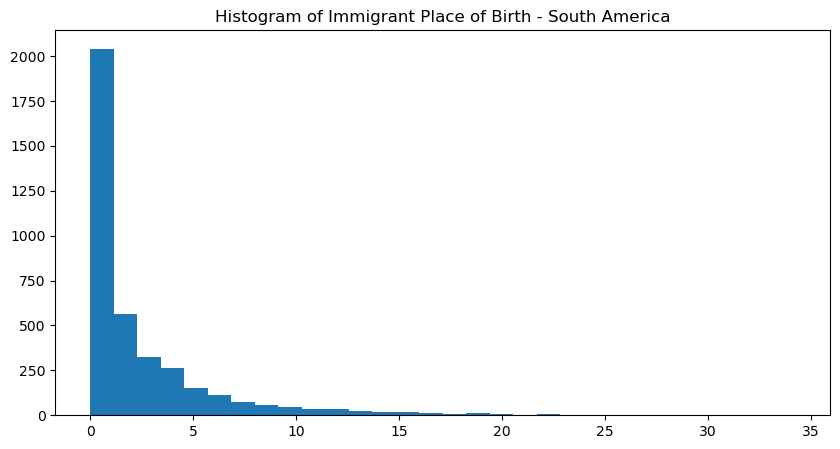

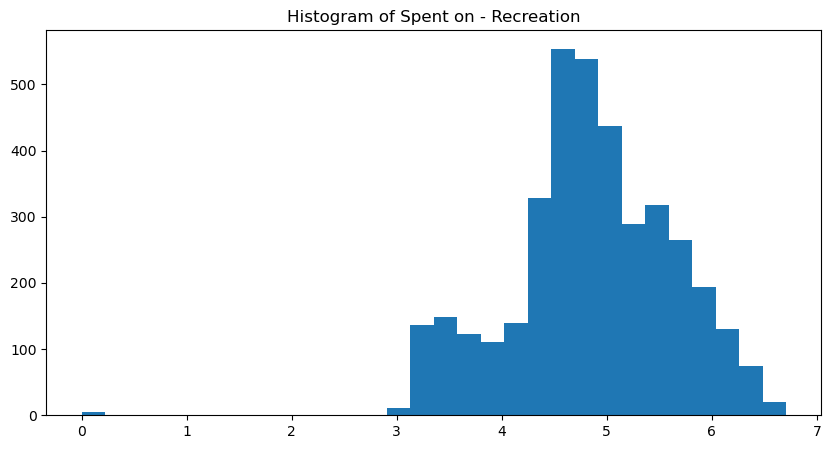

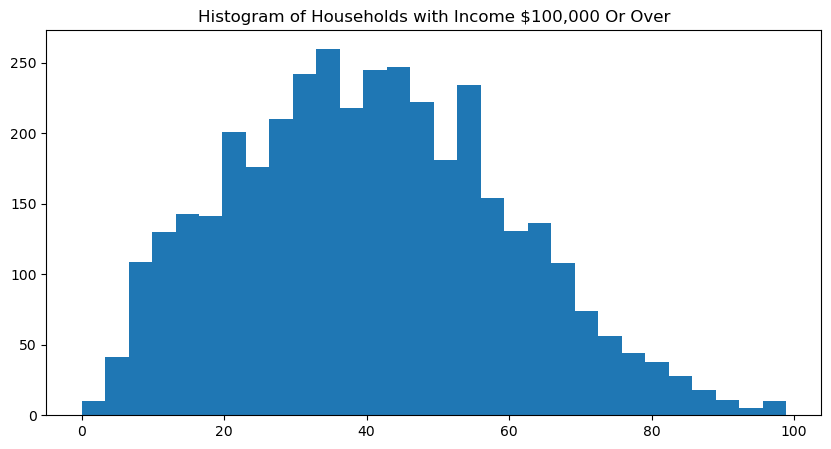

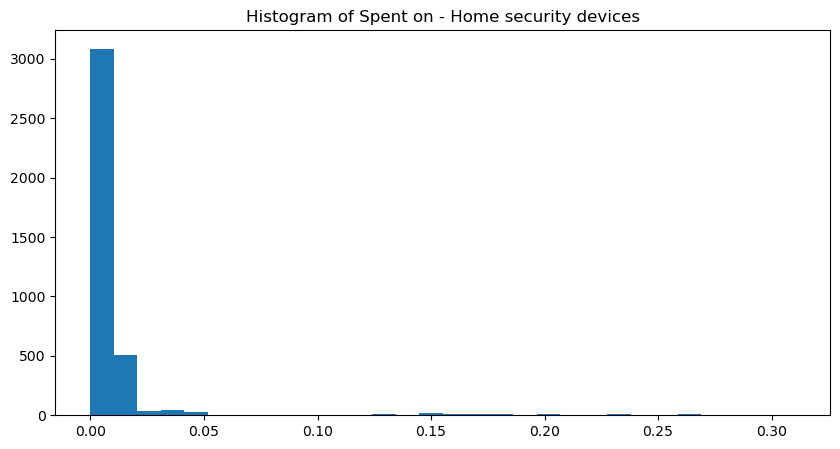

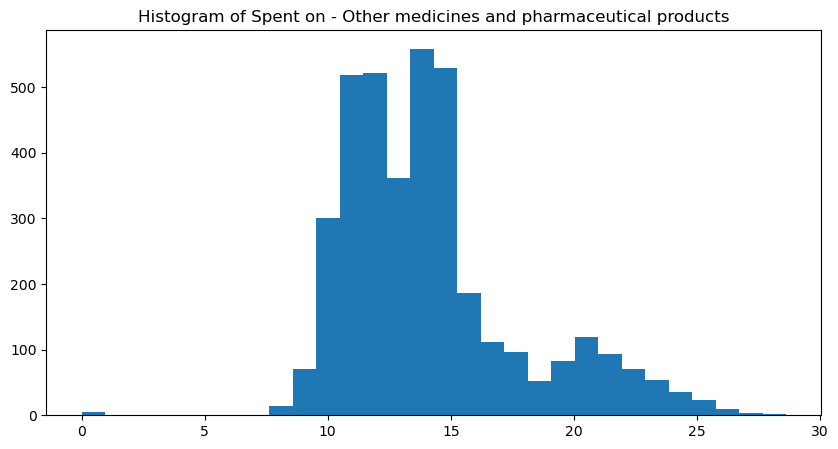

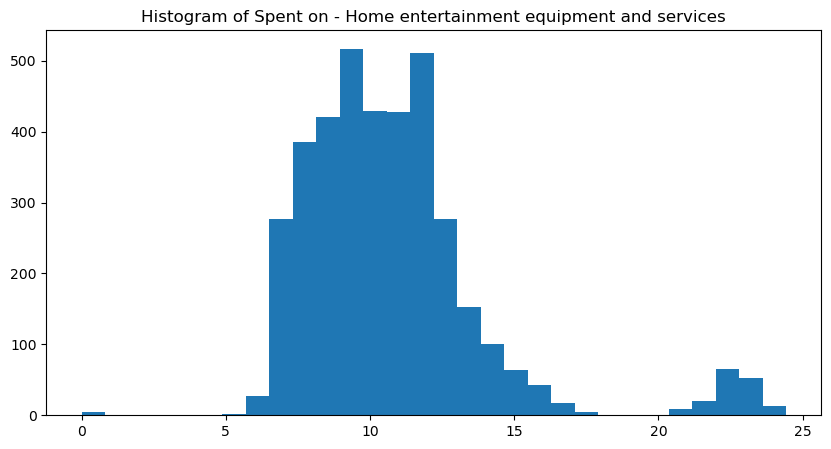

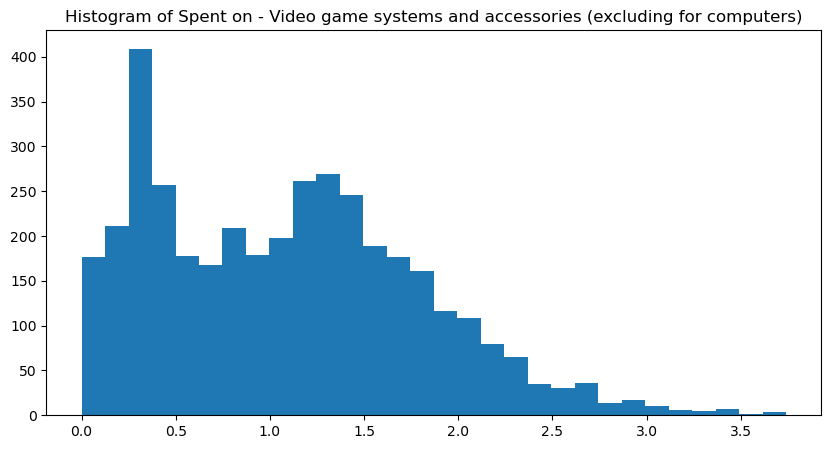

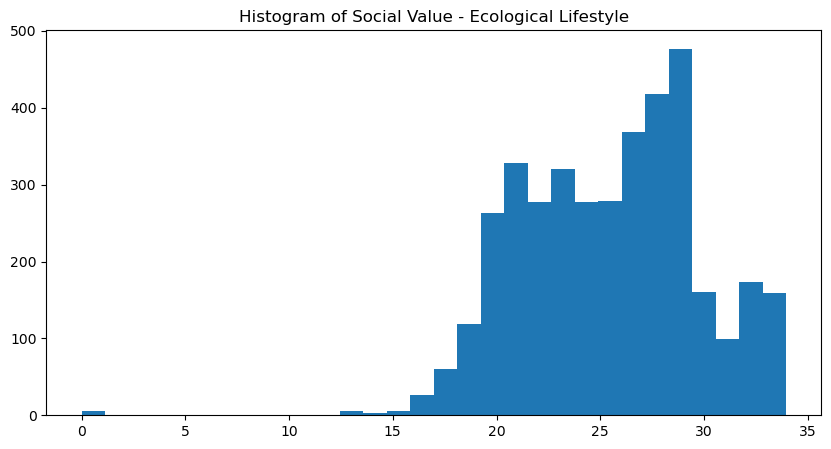

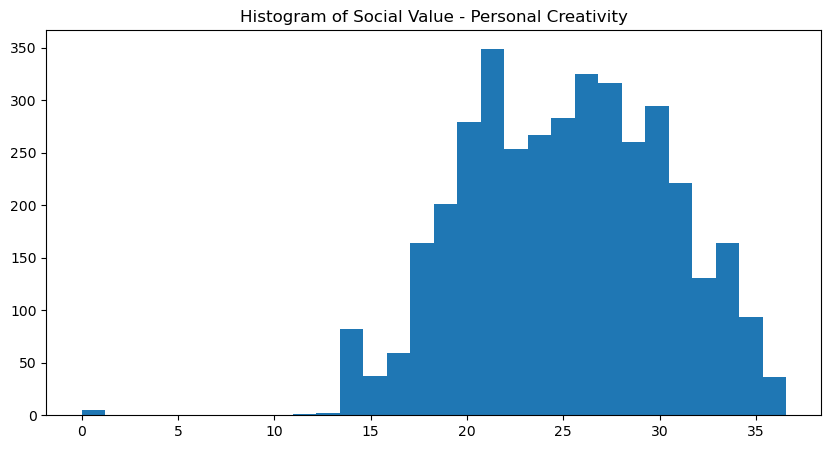

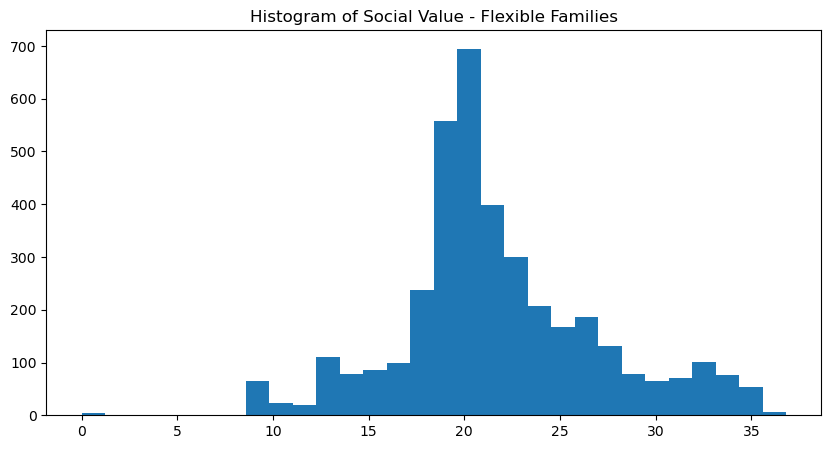

In [ ]:
# Create a new list that includes DEPVAR7 and all the features in Final_Bucket_List
columns_to_select = ['DEPVAR7'] + Final_Bucket_List

# Select the variables for EDA
selected_data = data[columns_to_select]

# Summary statistics
print(selected_data.describe())

# Check for missing values
print(selected_data.isnull().sum())

# Histograms
for var in columns_to_select:
    plt.figure(figsize=(10, 5))
    plt.hist(data[var], bins=30)
    plt.title(f'Histogram of {label_dict[var]}')
    plt.show()



In [ ]:
selected_features = ['HSTA001S', 'ECYRELCATH', 'ECYTRAPSGR', 'ECYTIMSAM', 'HSRE001S', 'WSIN100_P', 'HSRM014', 'HSHC004B', 'HSRE040', 'HSRE006', 'SV00025', 'SV00061', 'SV00035']
selected_data = data[selected_features + ['DEPVAR7']]

In [ ]:
summary_statistics = selected_data.groupby('DEPVAR7').describe().T
print(summary_statistics)

DEPVAR7             0.00       2.54       2.73       2.98       2.99   \
HSTA001S count   6.000000   1.000000   1.000000   1.000000   1.000000   
         mean    0.448096   3.680125   3.573195   3.625755   3.932866   
         std     1.097606        NaN        NaN        NaN        NaN   
         min     0.000000   3.680125   3.573195   3.625755   3.932866   
         25%     0.000000   3.680125   3.573195   3.625755   3.932866   
...                   ...        ...        ...        ...        ...   
SV00035  min     0.000000  24.062700  16.169722  20.655991  15.894511   
         25%     0.000000  24.062700  16.169722  20.655991  15.894511   
         50%     0.000000  24.062700  16.169722  20.655991  15.894511   
         75%     0.000000  24.062700  16.169722  20.655991  15.894511   
         max    26.313017  24.062700  16.169722  20.655991  15.894511   

DEPVAR7             3.09      3.11       3.21       3.22       3.24   ...  \
HSTA001S count   1.000000   1.00000   1.000000

In [ ]:
# Iterate over each variable in Final_Bucket_List
for var in Final_Bucket_List:
    # Print the variable label and descriptive statistics
    print(f"Descriptive Statistics for {label_dict[var]}:")
    print(data[var].describe())
    print("\n")


Descriptive Statistics for Spent on - Tobacco products and alcoholic beverages:
count    3823.000000
mean        3.501889
std         0.940520
min         0.000000
25%         2.905035
50%         3.427946
75%         4.013377
max         6.747631
Name: HSTA001S, dtype: float64


Descriptive Statistics for Religion - Catholic:
count    3823.000000
mean       31.384886
std        16.710426
min         0.000000
25%        19.256787
50%        28.765957
75%        40.826719
max        96.755725
Name: ECYRELCATH, dtype: float64


Descriptive Statistics for Travel To Work By Car As Passenger:
count    3823.000000
mean        2.964597
std         2.897186
min         0.000000
25%         0.937427
50%         1.951220
75%         4.272934
max        22.663551
Name: ECYTRAPSGR, dtype: float64


Descriptive Statistics for Immigrant Place of Birth - South America:
count    3823.000000
mean        2.408161
std         3.735928
min         0.000000
25%         0.000000
50%         0.975610
75%    

In [ ]:
# Iterate over each variable in Final_Bucket_List
for var in Final_Bucket_List:
    # Compute correlation with the target variable DEPVAR7
    corr_with_depvar7 = data[[var, 'DEPVAR7']].corr().iloc[0, 1]
    print(f'Correlation between {label_dict[var]} and {label_dict["DEPVAR7"]}: {corr_with_depvar7}')

Correlation between Spent on - Tobacco products and alcoholic beverages and Spent on Cannabis ($/month): 0.16629153582108175
Correlation between Religion - Catholic and Spent on Cannabis ($/month): -0.16481562965250016
Correlation between Travel To Work By Car As Passenger and Spent on Cannabis ($/month): 0.05647470980109116
Correlation between Immigrant Place of Birth - South America and Spent on Cannabis ($/month): 0.09393721512355668
Correlation between Spent on - Recreation and Spent on Cannabis ($/month): -0.45429398247360125
Correlation between Households with Income $100,000 Or Over and Spent on Cannabis ($/month): -0.3133476989610748
Correlation between Spent on - Home security devices and Spent on Cannabis ($/month): -0.22549638071690106
Correlation between Spent on - Other medicines and pharmaceutical products and Spent on Cannabis ($/month): 0.16892373503754465
Correlation between Spent on - Home entertainment equipment and services and Spent on Cannabis ($/month): 0.6279751

In [ ]:
# List of selected features
selected_features = ['HSTA001S', 'ECYRELCATH', 'ECYTRAPSGR', 'ECYTIMSAM', 'HSRE001S', 'WSIN100_P',
                     'HSRM014', 'HSHC004B', 'HSRE040', 'HSRE006', 'SV00025', 'SV00061', 'SV00035']

# Target variable
target_variable = 'DEPVAR7'

# Create a DataFrame with the selected features and target variable
df_eda = data[selected_features + [target_variable]].copy()

# Number of bins for each feature
num_bins = 3

# Binning each selected feature
for feature in selected_features:
    df_eda[f'{feature}_bin'] = pd.cut(df_eda[feature], bins=num_bins)

# Display the DataFrame with the bins for each selected feature
print(df_eda.head())

   HSTA001S  ECYRELCATH  ECYTRAPSGR  ECYTIMSAM  HSRE001S  WSIN100_P   HSRM014  \
0  3.554094   16.189897    3.371648   0.365186  5.646276  55.909944  0.005745   
1  3.870910   11.296296    0.426439   0.000000  4.888873  34.666667  0.003317   
2  3.593029   19.874804    2.025783   0.391236  5.853784  65.495868  0.004860   
3  3.012937   40.608696    4.939627   3.652174  4.980991  60.429448  0.003071   
4  4.085336   56.450216    2.579979   0.519481  4.415984  37.777778  0.011496   

    HSHC004B    HSRE040   HSRE006  ...      ECYTIMSAM_bin    HSRE001S_bin  \
0  13.044134  10.988080  0.787101  ...  (-0.0342, 11.404]  (4.471, 6.707]   
1  16.739861   6.872778  1.002598  ...  (-0.0342, 11.404]  (4.471, 6.707]   
2  14.526546   7.914459  1.159358  ...  (-0.0342, 11.404]  (4.471, 6.707]   
3  21.069539  12.594317  1.426436  ...  (-0.0342, 11.404]  (4.471, 6.707]   
4  14.482520   9.974290  1.439918  ...  (-0.0342, 11.404]  (2.236, 4.471]   

     WSIN100_P_bin        HSRM014_bin      HSHC004

In [ ]:
# Calculate the mean of the target variable for each unique combination of feature bin values
binned_means = df_eda.groupby([f'{feature}_bin' for feature in selected_features])[target_variable].mean().reset_index()
# Print the first few rows of the 'binned_means' DataFrame to check the result
print(binned_means.head())

        HSTA001S_bin     ECYRELCATH_bin    ECYTRAPSGR_bin      ECYTIMSAM_bin  \
0  (-0.00675, 2.249]  (-0.0968, 32.252]  (-0.0227, 7.555]  (-0.0342, 11.404]   
1  (-0.00675, 2.249]  (-0.0968, 32.252]  (-0.0227, 7.555]  (-0.0342, 11.404]   
2  (-0.00675, 2.249]  (-0.0968, 32.252]  (-0.0227, 7.555]  (-0.0342, 11.404]   
3  (-0.00675, 2.249]  (-0.0968, 32.252]  (-0.0227, 7.555]  (-0.0342, 11.404]   
4  (-0.00675, 2.249]  (-0.0968, 32.252]  (-0.0227, 7.555]  (-0.0342, 11.404]   

        HSRE001S_bin      WSIN100_P_bin        HSRM014_bin     HSHC004B_bin  \
0  (-0.00671, 2.236]  (-0.0989, 32.965]  (-0.00031, 0.103]  (-0.0286, 9.54]   
1  (-0.00671, 2.236]  (-0.0989, 32.965]  (-0.00031, 0.103]  (-0.0286, 9.54]   
2  (-0.00671, 2.236]  (-0.0989, 32.965]  (-0.00031, 0.103]  (-0.0286, 9.54]   
3  (-0.00671, 2.236]  (-0.0989, 32.965]  (-0.00031, 0.103]  (-0.0286, 9.54]   
4  (-0.00671, 2.236]  (-0.0989, 32.965]  (-0.00031, 0.103]  (-0.0286, 9.54]   

        HSRE040_bin        HSRE006_bin      

In [ ]:
# Check the columns of the 'binned_means' DataFrame
print(binned_means.columns)

Index(['HSTA001S_bin', 'ECYRELCATH_bin', 'ECYTRAPSGR_bin', 'ECYTIMSAM_bin',
       'HSRE001S_bin', 'WSIN100_P_bin', 'HSRM014_bin', 'HSHC004B_bin',
       'HSRE040_bin', 'HSRE006_bin', 'SV00025_bin', 'SV00061_bin',
       'SV00035_bin', 'DEPVAR7'],
      dtype='object')


In [ ]:
# Print the 'selected_features' list
print("Selected Features:", selected_features)

# Check if all selected feature names have the "_bin" suffix in 'binned_means' DataFrame
bin_columns = [f'{feature}_bin' for feature in selected_features]
print("Selected Feature Columns with '_bin' suffix:", bin_columns)

# Check if all selected feature names with "_bin" suffix are present in the 'binned_means' DataFrame
missing_columns = [col for col in bin_columns if col not in binned_means.columns]
print("Missing Columns in binned_means DataFrame:", missing_columns)


Selected Features: ['HSTA001S', 'ECYRELCATH', 'ECYTRAPSGR', 'ECYTIMSAM', 'HSRE001S', 'WSIN100_P', 'HSRM014', 'HSHC004B', 'HSRE040', 'HSRE006', 'SV00025', 'SV00061', 'SV00035']
Selected Feature Columns with '_bin' suffix: ['HSTA001S_bin', 'ECYRELCATH_bin', 'ECYTRAPSGR_bin', 'ECYTIMSAM_bin', 'HSRE001S_bin', 'WSIN100_P_bin', 'HSRM014_bin', 'HSHC004B_bin', 'HSRE040_bin', 'HSRE006_bin', 'SV00025_bin', 'SV00061_bin', 'SV00035_bin']
Missing Columns in binned_means DataFrame: []


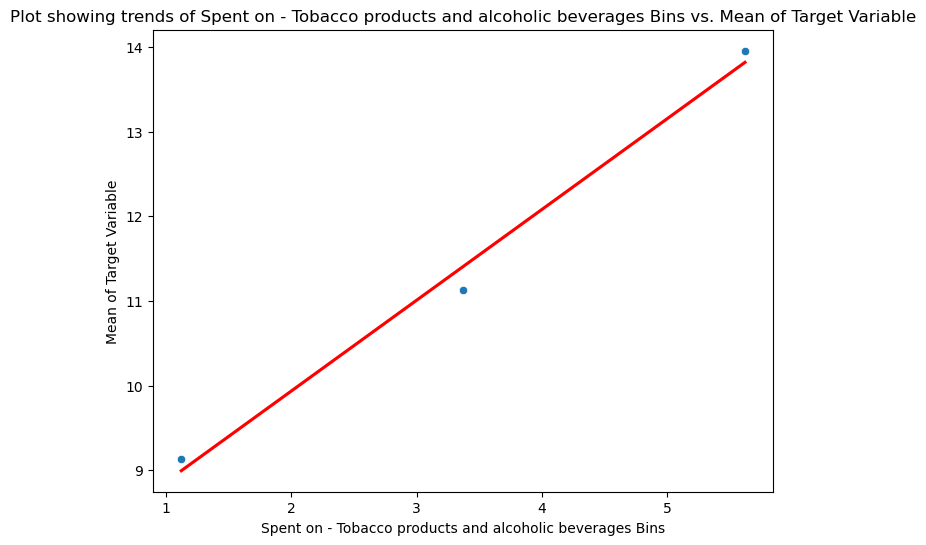

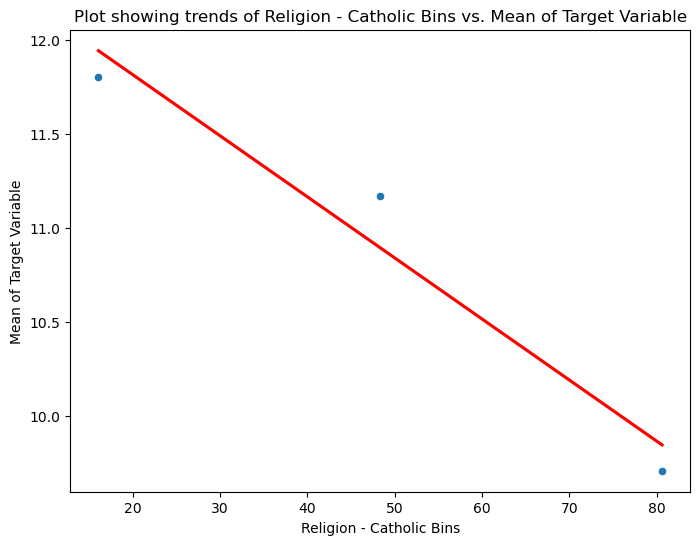

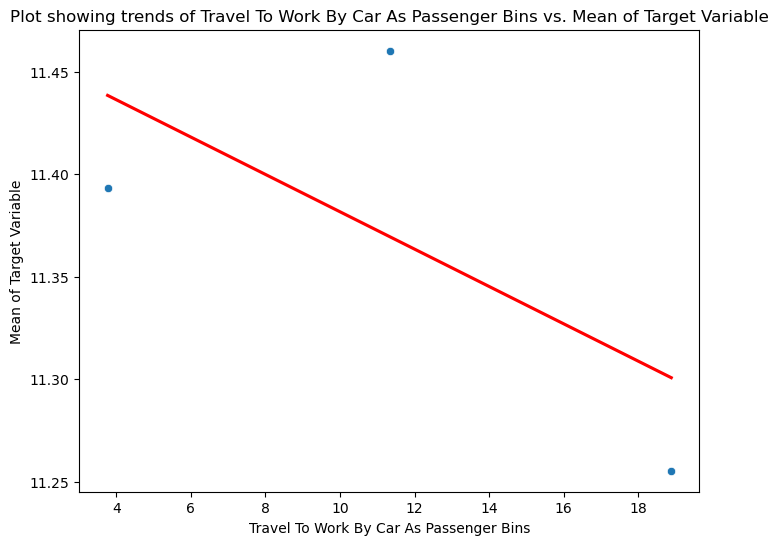

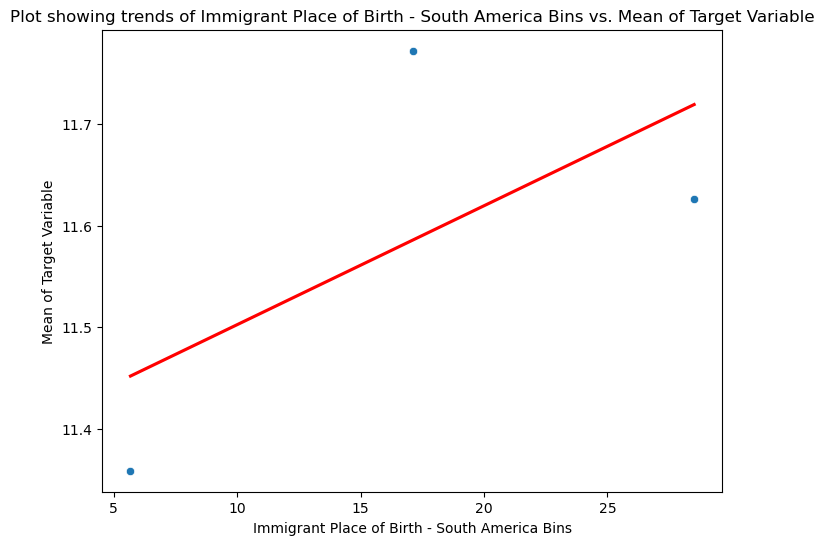

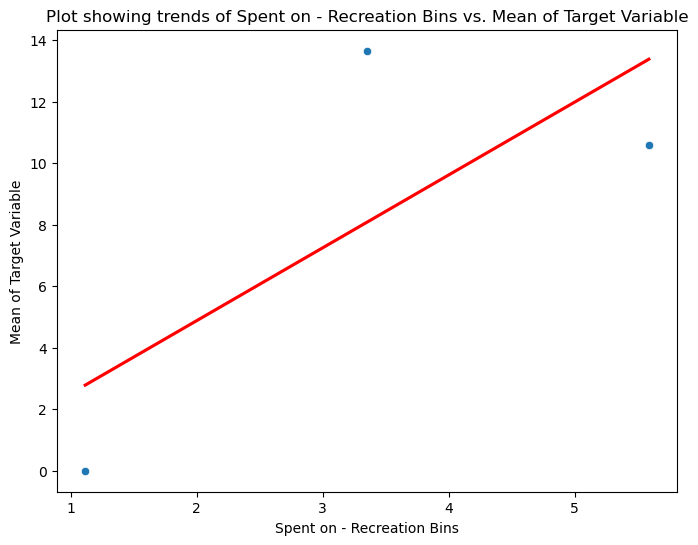

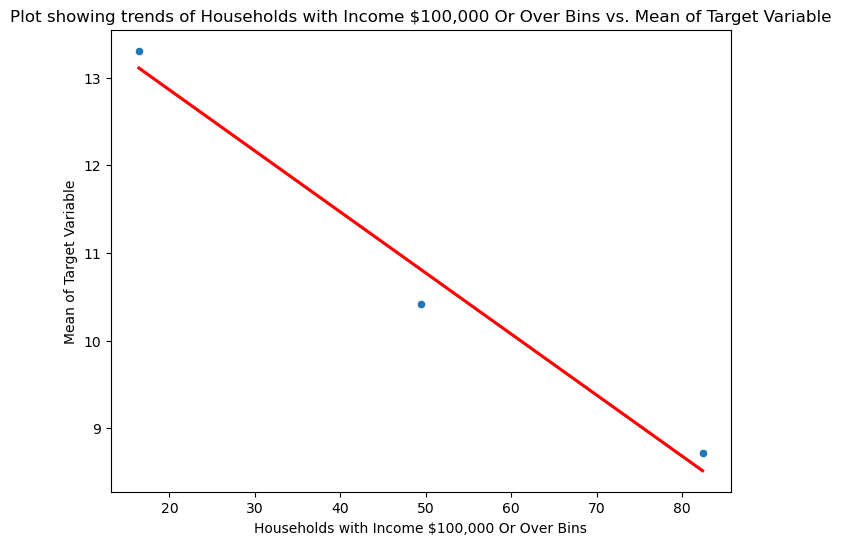

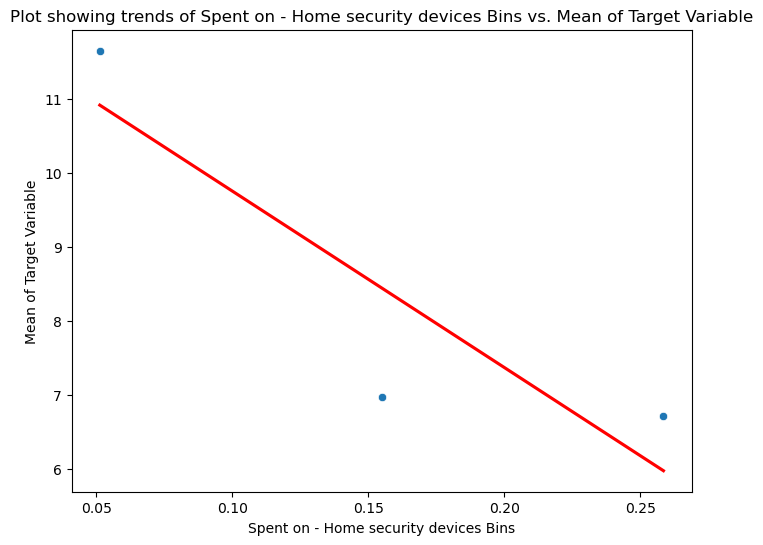

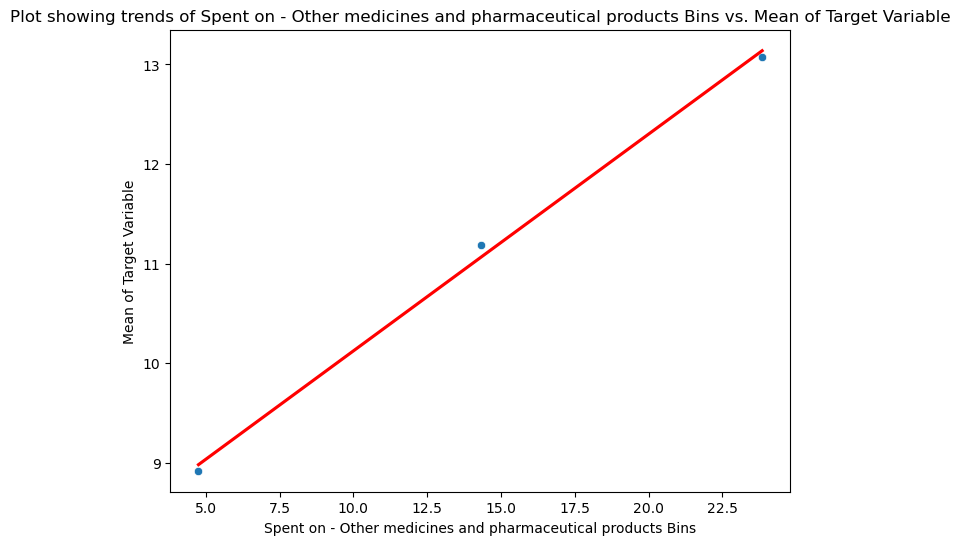

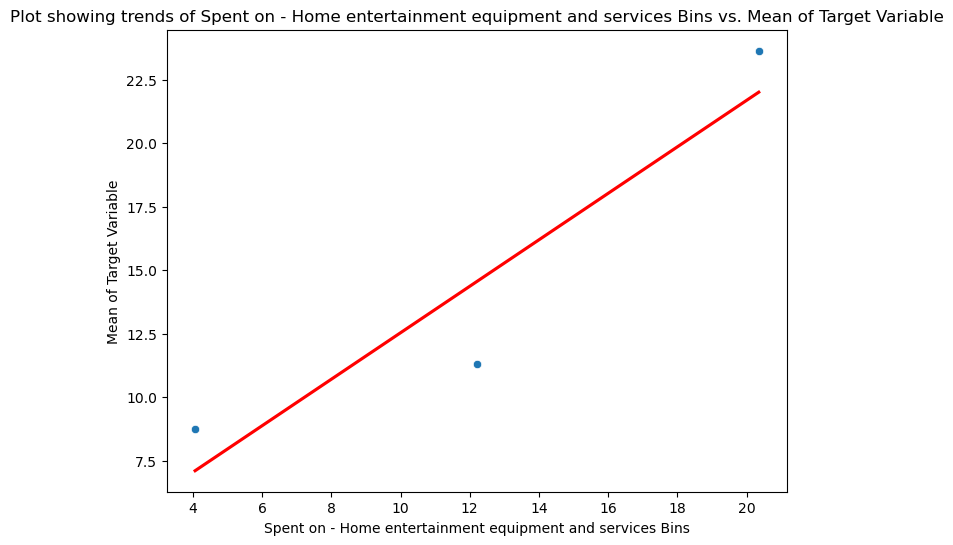

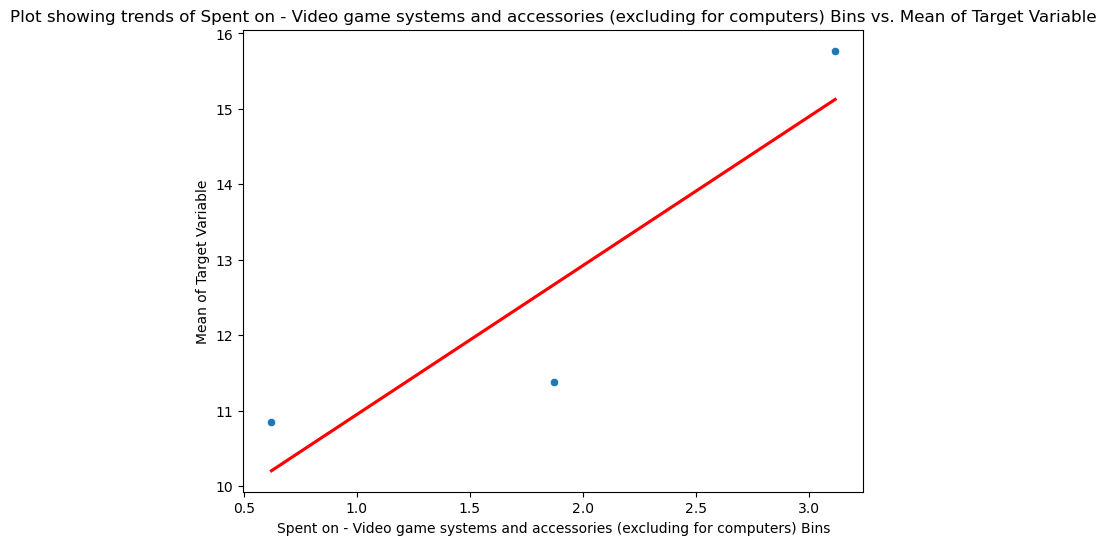

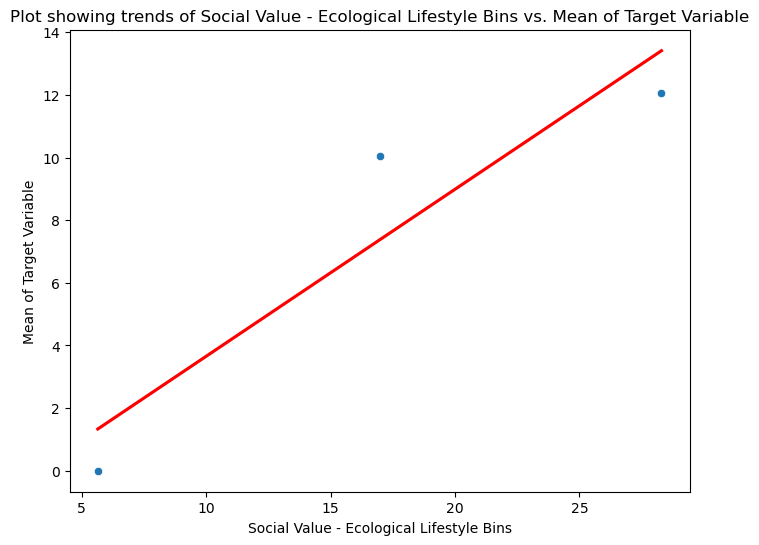

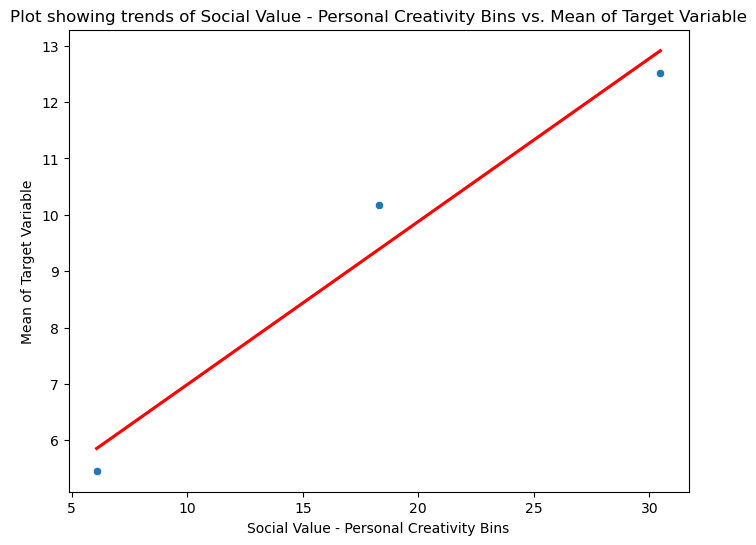

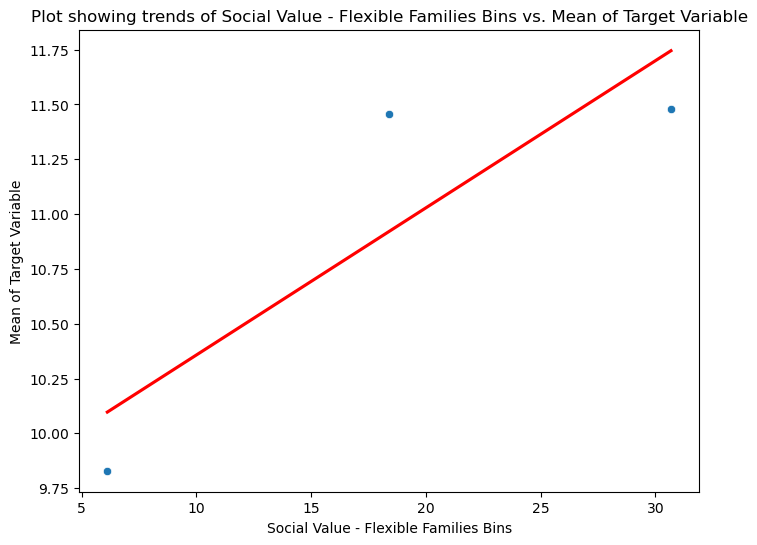

In [ ]:
# Iterate through the selected features
for feature in selected_features:
    # Get the unique bins for the current feature
    unique_bins = binned_means[f'{feature}_bin'].unique()

    # Calculate the midpoints of the bins
    bin_midpoints = [(bin.left + bin.right) / 2 for bin in unique_bins]

    # Get the mean target variable values for each bin
    mean_target_values = binned_means.groupby(f'{feature}_bin')[target_variable].mean()

    # Create a scatter plot for each feature bin against the mean of the target variable
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=bin_midpoints, y=mean_target_values)

    # Add a linear trend line to the scatter plot
    sns.regplot(x=bin_midpoints, y=mean_target_values, scatter=False, ci=None, line_kws={'color': 'red'})

    # Set plot labels and title
    plt.xlabel(f'{label_dict[feature]} Bins')
    plt.ylabel('Mean of Target Variable')
    plt.title(f'Plot showing trends of {label_dict[feature]} Bins vs. Mean of Target Variable')

    # Show the plot
    plt.show()

In [ ]:
# Exploratory Data Analysis on 2 variables that were not statistically significant
print(data[['ECYACTUR', 'ECYHOMFREN']].describe())

          ECYACTUR   ECYHOMFREN
count  3823.000000  3823.000000
mean      6.538870     0.530093
std       2.530421     0.678724
min       0.000000     0.000000
25%       4.700000     0.000000
50%       6.200000     0.265152
75%       7.900000     0.844239
max      25.200000     8.196721


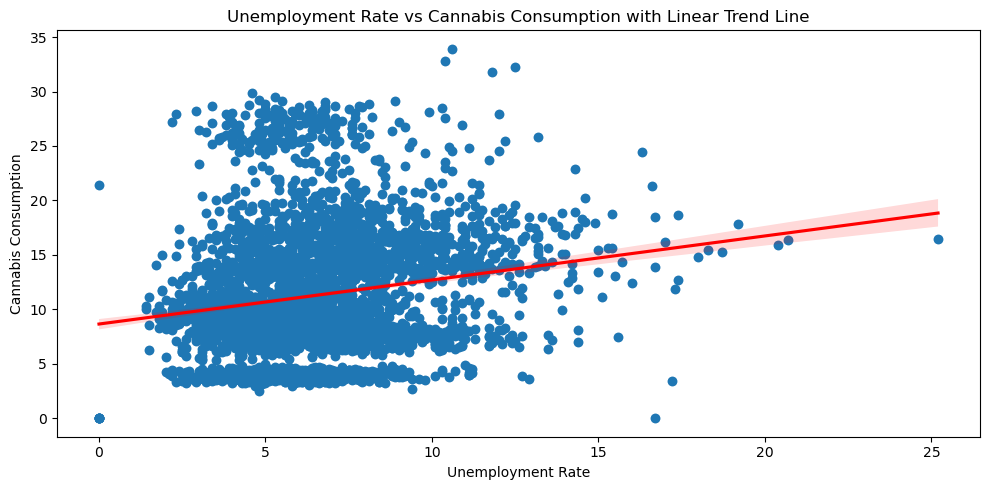

In [ ]:
# Scatter plot of 'ECYACTUR' against 'DEPVAR7'
plt.figure(figsize=(10, 5))

plt.scatter(data['ECYACTUR'], data['DEPVAR7'])
plt.title('Unemployment Rate vs Cannabis Consumption')
plt.xlabel('Unemployment Rate')
plt.ylabel('Cannabis Consumption')
plt.tight_layout()

# Linear trend line with slope calculation

sns.regplot(x='ECYACTUR', y='DEPVAR7', data=data, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Unemployment Rate vs Cannabis Consumption with Linear Trend Line')
plt.xlabel('Unemployment Rate')
plt.ylabel('Cannabis Consumption')

# Calculate the slope of the linear regression line
x = data['ECYACTUR']
y = data['DEPVAR7']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]

plt.tight_layout()
plt.show()

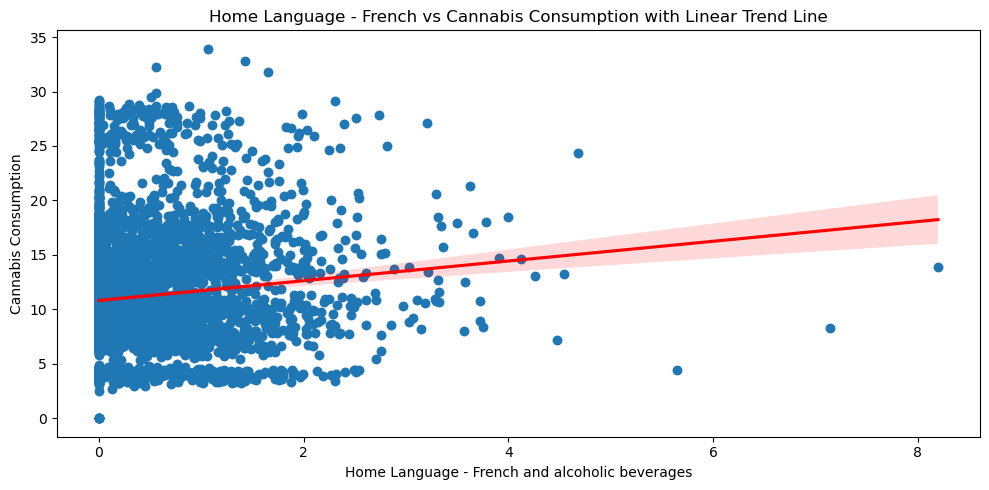

In [ ]:
# Scatter plot of 'ECYHOMFREN' against 'DEPVAR7'
plt.figure(figsize=(10, 5))

plt.scatter(data['ECYHOMFREN'], data['DEPVAR7'])
plt.title('Home Language - French vs Cannabis Consumption')
plt.xlabel('Home Language - French and alcoholic beverages')
plt.ylabel('Cannabis Consumption')
plt.tight_layout()

# Linear trend line with slope calculation

sns.regplot(x='ECYHOMFREN', y='DEPVAR7', data=data, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Home Language - French vs Cannabis Consumption with Linear Trend Line')
plt.xlabel('Home Language - French and alcoholic beverages')
plt.ylabel('Cannabis Consumption')

# Calculate the slope of the linear regression line
x = data['ECYHOMFREN']
y = data['DEPVAR7']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]

plt.tight_layout()
plt.show()

In [ ]:
# Correlations w/ Target variable
print(data[['ECYACTUR', 'DEPVAR7']].corr())

print(data[['HSTA001S', 'DEPVAR7']].corr())

          ECYACTUR   DEPVAR7
ECYACTUR  1.000000  0.176926
DEPVAR7   0.176926  1.000000
          HSTA001S   DEPVAR7
HSTA001S  1.000000  0.166292
DEPVAR7   0.166292  1.000000


In [ ]:
# Create the target variable (DEPVAR7) and feature matrix (X)
X = data[Final_Bucket_List]
y = data['DEPVAR7']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a list to store the results of different models
model_results = []

In [ ]:
# Model 1: Multiple Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear_reg = linear_reg.predict(X_test)
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
model_results.append(('Multiple Regression', mse_linear_reg, r2_linear_reg))

# Model 2: Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
model_results.append(('Random Forest', mse_random_forest, r2_random_forest))

# Model 3: Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
model_results.append(('Decision Tree', mse_decision_tree, r2_decision_tree))

Model: Multiple Regression
Mean Squared Error: 14.149332104474441
R-squared: 0.5473759743110924


Model: Random Forest
Mean Squared Error: 2.6449592751633997
R-squared: 0.9153902031510667


Model: Decision Tree
Mean Squared Error: 5.8952857516339865
R-squared: 0.8114152703612617


Best Performing Model: Random Forest


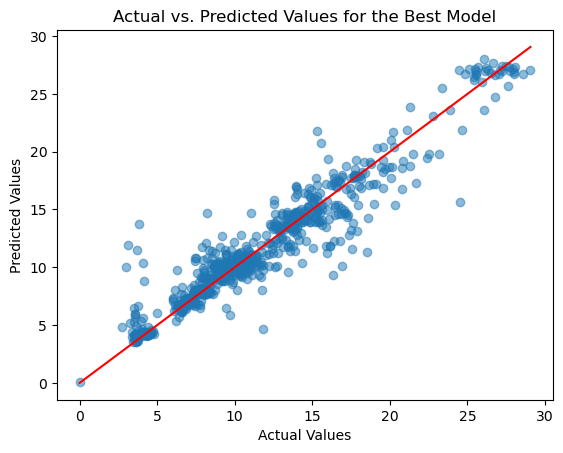

In [ ]:
# Evaluate the models and select the best performing model
best_model = min(model_results, key=lambda x: x[1])

# Print the results
for model_name, mse, r2 in model_results:
    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n')

print(f'Best Performing Model: {best_model[0]}')

# Generate predictions from the best model
if best_model[0] == 'Multiple Regression':
    y_pred_best_model = y_pred_linear_reg
elif best_model[0] == 'Random Forest':
    y_pred_best_model = y_pred_random_forest
else:
    y_pred_best_model = y_pred_decision_tree

# Plot the actual vs. predicted values for the best model
plt.scatter(y_test, y_pred_best_model, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for the Best Model')
plt.show()



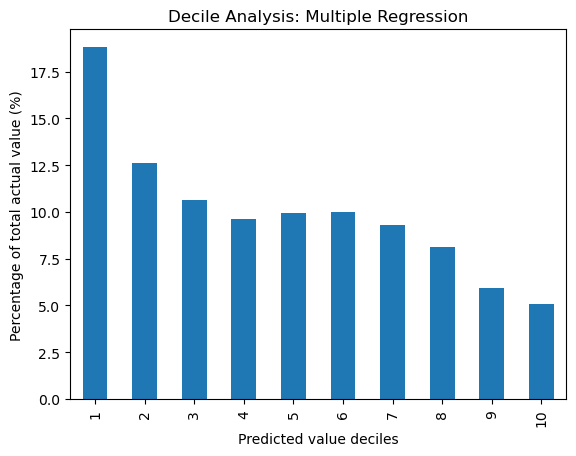

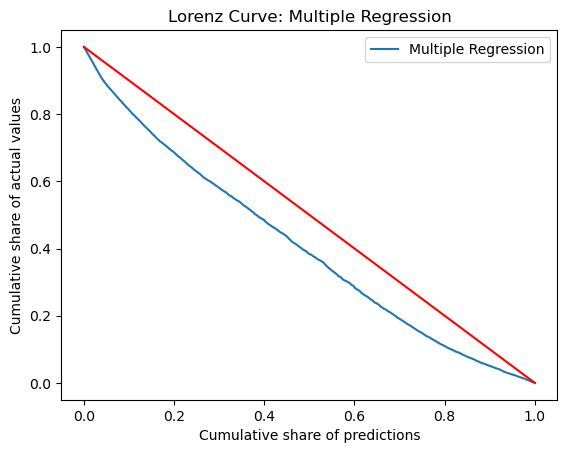

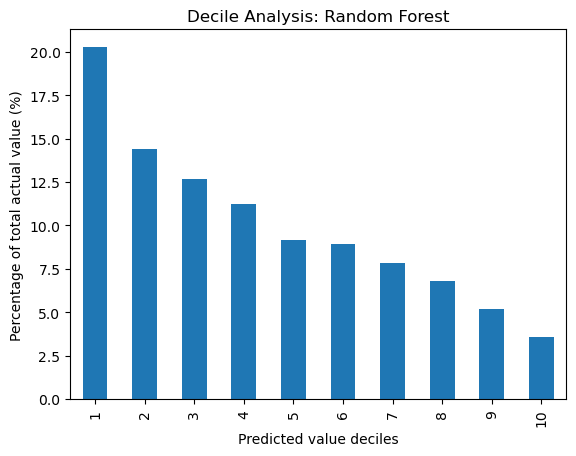

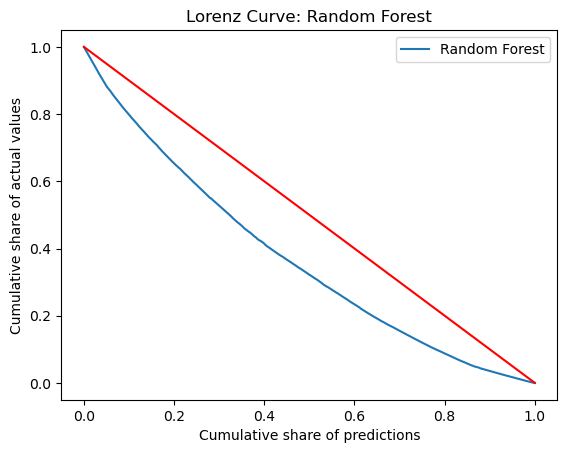

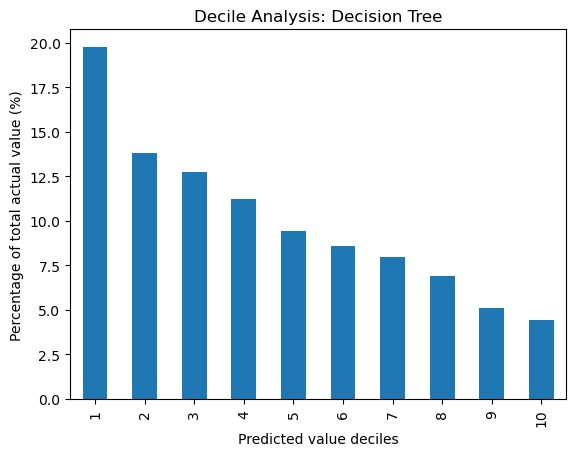

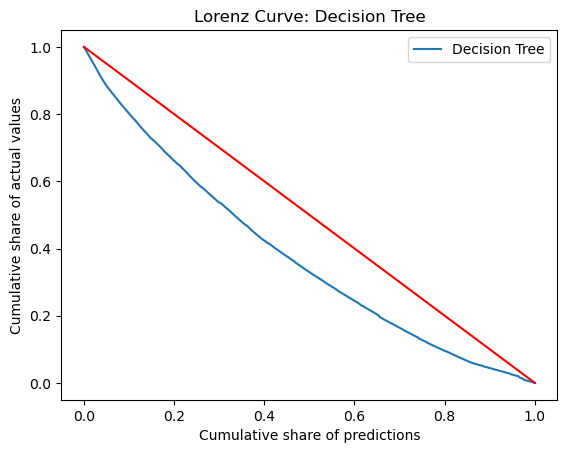

In [ ]:
# Create a list of models and their predictions
models = [('Multiple Regression', y_pred_linear_reg),
          ('Random Forest', y_pred_random_forest),
          ('Decision Tree', y_pred_decision_tree)]

# For each model, create a decile chart and Lorenz curve
for model_name, y_pred in models:
    # Create a dataframe with the actual and predicted values
    df_val = pd.DataFrame({
        'actual': y_test,
        'predicted': y_pred
    })

    # Calculate the deciles for the predicted values
    df_val['decile'] = pd.qcut(df_val['predicted'], 10, labels=np.arange(1, 11))

    # Calculate the sum of actual value within each decile
    decile_analysis = df_val.groupby('decile')['actual'].sum()

    # Calculate the percentage of total actual values
    decile_analysis = (decile_analysis / df_val['actual'].sum()) * 100

    # Sort the decile analysis results by decile
    decile_analysis = decile_analysis.sort_index(ascending=False)

    # Plot the percentage of total actual value within each decile
    decile_analysis.plot(kind='bar', title=f'Decile Analysis: {model_name}')
    plt.ylabel('Percentage of total actual value (%)')
    plt.xlabel('Predicted value deciles')
    plt.xticks(np.arange(10), np.arange(1, 11))  # change x-axis labels from 1-10
    plt.show()

    # Calculate the cumulative distribution of actual values
    lorenz_curve = df_val.sort_values('predicted').actual.cumsum() / df_val.actual.sum()
    lorenz_curve = lorenz_curve.values
    lorenz_curve = np.insert(lorenz_curve, 0, 0)
    lorenz_curve_index = np.arange(lorenz_curve.size)/(lorenz_curve.size - 1)
    # Reverse the Lorenz curve for transposition
    lorenz_curve = lorenz_curve[::-1]
    lorenz_curve_index = 1 - lorenz_curve_index[::-1]

    # Plot the transposed Lorenz curve
    plt.plot(lorenz_curve_index, lorenz_curve, label=f'{model_name}')
    plt.plot([0,1], [1,0], color='red')
    plt.xlabel('Cumulative share of predictions')
    plt.ylabel('Cumulative share of actual values')
    plt.title(f'Lorenz Curve: {model_name}')
    plt.legend()
    plt.show()



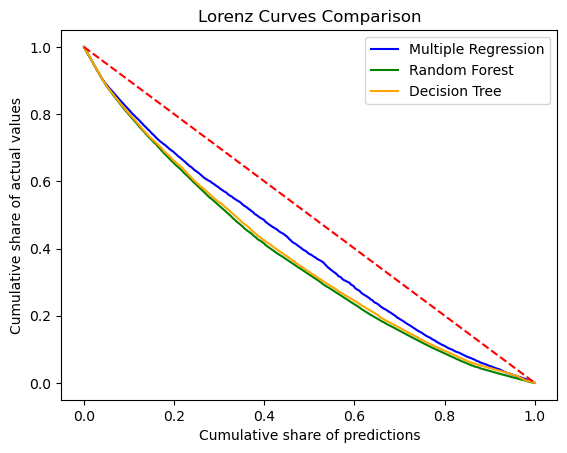

In [ ]:
# Create an empty list to store Lorenz curve data for each model
lorenz_curves = []

# For each model, calculate Lorenz curve data
for model_name, y_pred in models:
    # Check if lengths of y_test and y_pred match
    if len(y_test) != len(y_pred):
        print(f"Length mismatch for {model_name}. Skipping...")
        continue

    # Create a dataframe with the actual and predicted values
    df_val = pd.DataFrame({
        'actual': y_test,
        'predicted': y_pred
    })

    # Calculate the cumulative distribution of actual values
    lorenz_curve = df_val.sort_values('predicted').actual.cumsum() / df_val.actual.sum()
    lorenz_curve = lorenz_curve.values
    lorenz_curve = np.insert(lorenz_curve, 0, 0)
    lorenz_curve_index = np.arange(lorenz_curve.size) / (lorenz_curve.size - 1)

    # Reverse the Lorenz curve for transposition
    lorenz_curve = lorenz_curve[::-1]
    lorenz_curve_index = 1 - lorenz_curve_index[::-1]

    # Add the Lorenz curve data to the list
    lorenz_curves.append((model_name, lorenz_curve_index, lorenz_curve))

# Plot all the Lorenz curves on a single graph with different colors and labels
colors = ['blue', 'green', 'orange']  # Define colors for each model
for idx, (model_name, lorenz_curve_index, lorenz_curve) in enumerate(lorenz_curves):
    plt.plot(lorenz_curve_index, lorenz_curve, label=f'{model_name}', color=colors[idx])

# Plot the diagonal line
plt.plot([0,1], [1,0], color='red', linestyle='--')

plt.xlabel('Cumulative share of predictions')
plt.ylabel('Cumulative share of actual values')
plt.title('Lorenz Curves Comparison')
plt.legend()
plt.show()


In [ ]:
# Importing validation file
df = pd.read_csv(r'C:\Users\ksmakker\Documents\Digipodium Python Codes\BAN 210\ban210val1.csv')
df.head()

,PRCDDA,PRIZM5DA,SG,LS,DensityClusterCode15,DensityClusterCode5,DensityClusterCode5_lbl,DEPVAR7,TOT__SPENT7,ECYBASHPOP,...,SV00070,SV00074,SV00077,SV00079,SV00271,SV00086,SV00091,SV00093,DensityClusterCode15_2,SG_U2
0,35180019,22,S4,F5,12,4,Town,9.28,5473.75,755,...,19.587001,30.971775,28.471332,20.733143,25.670598,26.579700,25.657112,25.460169,0,0
1,35180021,51,T1,F4,7,2,Suburban,15.54,6929.26,550,...,22.611733,28.197517,25.115584,22.122328,24.341799,24.857639,29.303419,24.175218,0,0
2,35180022,39,S4,M1,7,2,Suburban,14.48,5400.20,477,...,22.047214,30.661437,26.856444,21.530161,25.627183,25.468078,25.035998,25.671960,0,0
3,35180024,06,S1,F8,12,4,Town,10.00,4248.96,536,...,19.710843,35.980845,30.487564,19.497061,25.929404,24.836095,23.367623,23.944761,0,0
4,35180026,26,S4,M1,4,3,Exurban,8.12,8677.28,1327,...,20.409294,30.671375,27.167779,21.913010,24.264529,25.949241,24.868139,26.766376,0,0


In [ ]:
# Preprocessing - drop non-numeric columns
df = df.select_dtypes(include=[np.number])

# Preprocessing - handle missing values
df = df.dropna()

X_val = df[Final_Bucket_List]
print(X)

      HSTA001S  ECYRELCATH  ECYTRAPSGR  ECYTIMSAM  HSRE001S  WSIN100_P  \
0     4.410335   23.841060    4.531250   0.000000  5.612669  47.386760   
1     4.369655    8.727273    0.000000   0.000000  5.842331  38.157895   
2     4.590761   11.740042    0.000000   0.000000  4.839782  30.136986   
3     3.270589   19.216418    5.422993   0.000000  5.802773  67.403315   
4     5.018514   22.607385    5.323869   0.301432  5.576102  48.263254   
...        ...         ...         ...        ...       ...        ...   
3697  4.853293   10.375276    8.888889   0.000000  4.751821  40.416667   
3698  3.318177   48.393195    2.217295   1.134216  5.479945  56.451613   
3699  3.996027   26.610169    1.785714   0.000000  5.903118  54.380665   
3700  4.343034   20.402085    4.866412   1.340283  5.099330  38.655462   
3701  4.837572   23.206751    6.341463   0.421941  5.106446  49.411765   

       HSRM014   HSHC004B    HSRE040   HSRE006    SV00025    SV00061  \
0     0.004711  13.897059   8.803969  1

In [ ]:
# Target variable
y_val = df['DEPVAR7']

# Model predictions and performance evaluation
model_results_val = []

# Model 1: Multiple Regression
y_pred_val_linear_reg = linear_reg.predict(X_val)
mse_val_linear_reg = mean_squared_error(y_val, y_pred_val_linear_reg)
r2_val_linear_reg = r2_score(y_val, y_pred_val_linear_reg)
model_results_val.append(('Multiple Regression', mse_val_linear_reg, r2_val_linear_reg))

# Model 2: Random Forest Regressor
y_pred_val_random_forest = random_forest.predict(X_val)
mse_val_random_forest = mean_squared_error(y_val, y_pred_val_random_forest)
r2_val_random_forest = r2_score(y_val, y_pred_val_random_forest)
model_results_val.append(('Random Forest', mse_val_random_forest, r2_val_random_forest))

# Model 3: Decision Tree Regressor
y_pred_val_decision_tree = decision_tree.predict(X_val)
mse_val_decision_tree = mean_squared_error(y_val, y_pred_val_decision_tree)
r2_val_decision_tree = r2_score(y_val, y_pred_val_decision_tree)
model_results_val.append(('Decision Tree', mse_val_decision_tree, r2_val_decision_tree))

model_results_val

[('Multiple Regression', 15.170447463598538, 0.5532986902216389),
 ('Random Forest', 2.7777744827363593, 0.9182070599641425),
 ('Decision Tree', 6.702463019989195, 0.802642669772642)]

Model: Multiple Regression
Mean Squared Error: 15.170447463598538
R-squared: 0.5532986902216389


Model: Random Forest
Mean Squared Error: 2.7777744827363593
R-squared: 0.9182070599641425


Model: Decision Tree
Mean Squared Error: 6.702463019989195
R-squared: 0.802642669772642


Best Performing Model: Random Forest


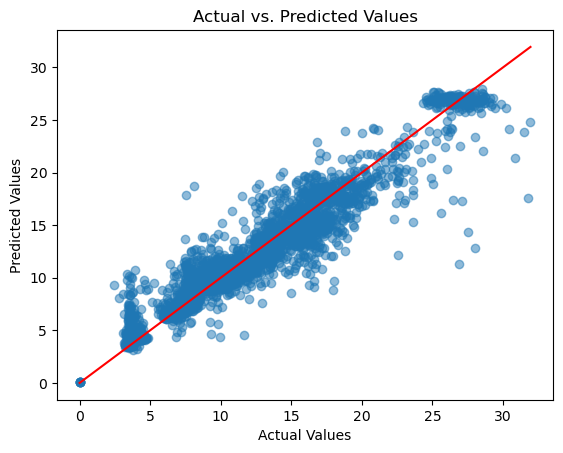

In [ ]:
# Evaluate the models and select the best performing model
best_model = min(model_results_val, key=lambda x: x[1])

# Print the results
for model_name, mse, r2 in model_results_val:
    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n')

print(f'Best Performing Model: {best_model[0]}')

# Generate predictions from the best model
if best_model[0] == 'Multiple Regression':
    y_pred_best_model = y_pred_val_linear_reg
elif best_model[0] == 'Random Forest':
    y_pred_best_model = y_pred_val_random_forest
else:
    y_pred_best_model = y_pred_val_decision_tree

# Plot the actual vs. predicted values for the best model
plt.scatter(y_val, y_pred_best_model, alpha=0.5)
plt.plot([0, max(y_val)], [0, max(y_val)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


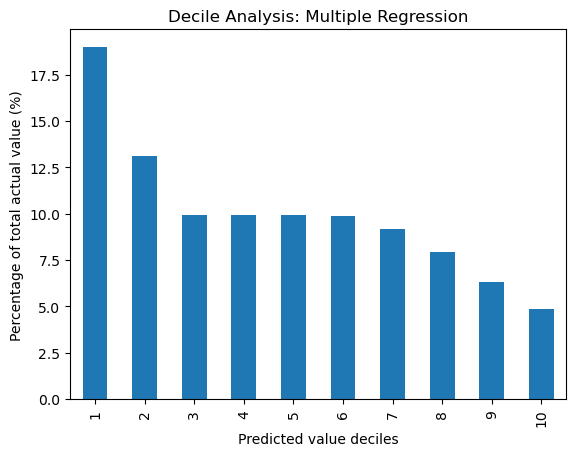

Area under the Lorenz curve:  0.4044233972532596
Gini coefficient:  -0.1911532054934808


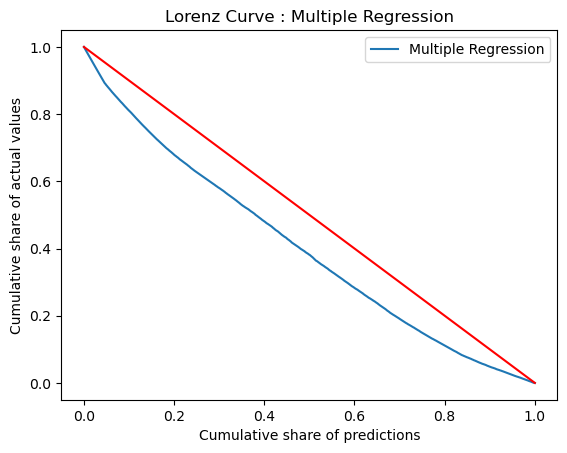

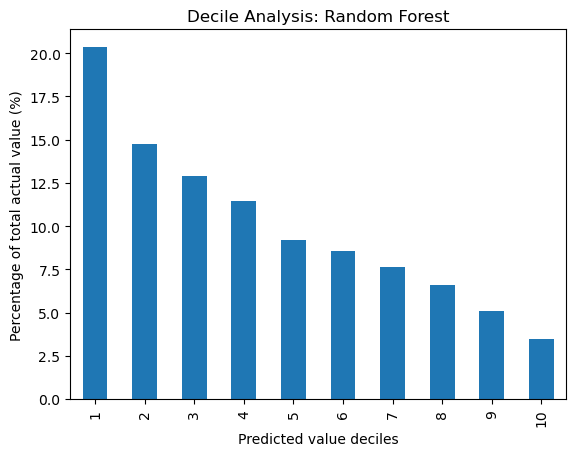

Area under the Lorenz curve:  0.366479547486115
Gini coefficient:  -0.26704090502777


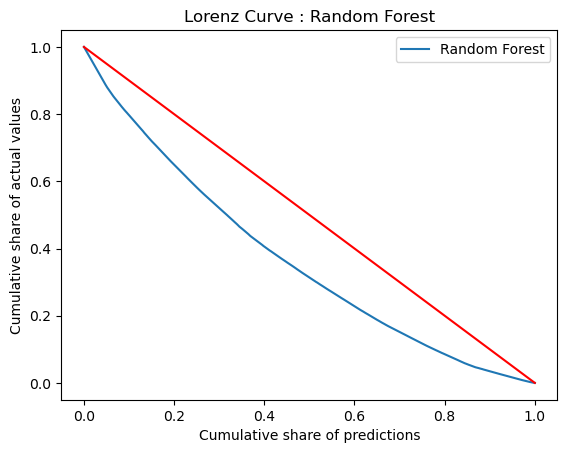

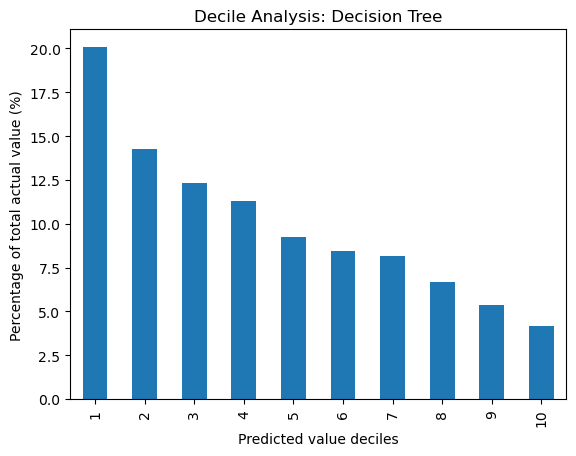

Area under the Lorenz curve:  0.3756639347117525
Gini coefficient:  -0.24867213057649495


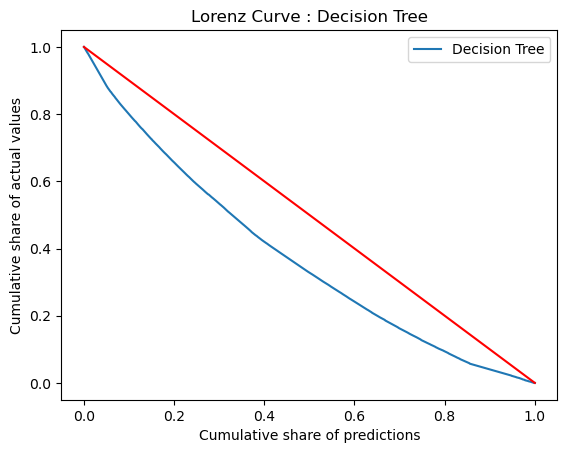

In [ ]:
models = [('Multiple Regression', y_pred_val_linear_reg),
          ('Random Forest', y_pred_val_random_forest),
          ('Decision Tree', y_pred_val_decision_tree)]

# For each model, create a decile chart and Lorenz curve
for model_name, y_pred in models:
    # Create a dataframe with the actual and predicted values
    df_val = pd.DataFrame({
        'actual': y_val,
        'predicted': y_pred
    })

    # Calculate the deciles for the predicted values
    df_val['decile'] = pd.qcut(df_val['predicted'], 10, labels=np.arange(1, 11))

    # Calculate the sum of actual value within each decile
    decile_analysis = df_val.groupby('decile')['actual'].sum()

    # Calculate the percentage of total actual values
    decile_analysis = (decile_analysis / df_val['actual'].sum()) * 100

    # Sort the decile analysis results by decile
    decile_analysis = decile_analysis.sort_index(ascending=False)

    # Plot the percentage of total actual value within each decile
    decile_analysis.plot(kind='bar', title=f'Decile Analysis: {model_name}')
    plt.ylabel('Percentage of total actual value (%)')
    plt.xlabel('Predicted value deciles')
    plt.xticks(np.arange(10), np.arange(1, 11))  # change x-axis labels from 1-10
    plt.show()

    # Calculate the cumulative distribution of actual values
    lorenz_curve = df_val.sort_values('predicted').actual.cumsum() / df_val.actual.sum()
    lorenz_curve = lorenz_curve.values
    lorenz_curve = np.insert(lorenz_curve, 0, 0)
    lorenz_curve_index = np.arange(lorenz_curve.size)/(lorenz_curve.size - 1)
    # Reverse the Lorenz curve for transposition
    lorenz_curve = lorenz_curve[::-1]
    lorenz_curve_index = 1 - lorenz_curve_index[::-1]

    # Calculate the area under the Lorenz curve
    area_under_curve = np.trapz(lorenz_curve, lorenz_curve_index)

    # Calculate the Gini coefficient
    gini_coefficient = 2 * area_under_curve - 1

    print("Area under the Lorenz curve: ", area_under_curve)
    print("Gini coefficient: ", gini_coefficient)

    # Plot the Lorenz curve
    plt.plot(lorenz_curve_index, lorenz_curve, label=f'{model_name}')
    plt.plot([0,1], [1,0], color='red')
    plt.xlabel('Cumulative share of predictions')
    plt.ylabel('Cumulative share of actual values')
    plt.title(f'Lorenz Curve : {model_name}')
    plt.legend()
    plt.show()


Model: Multiple Regression
Area under the Lorenz curve:  0.4044233972532596
Gini coefficient:  -0.1911532054934808
Model: Random Forest
Area under the Lorenz curve:  0.366479547486115
Gini coefficient:  -0.26704090502777
Model: Decision Tree
Area under the Lorenz curve:  0.3756639347117525
Gini coefficient:  -0.24867213057649495


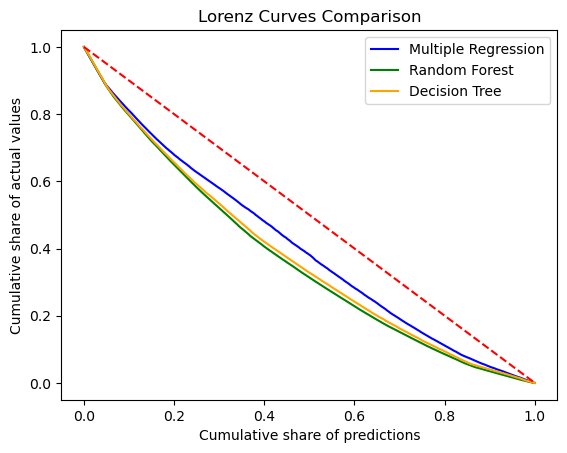

In [ ]:
# Create an empty list to store Lorenz curve data for each model
lorenz_curves = []

# For each model, calculate Lorenz curve data
for model_name, y_pred in models:
    # Create a dataframe with the actual and predicted values
    df_val = pd.DataFrame({
        'actual': y_val,
        'predicted': y_pred
    })

    # Calculate the cumulative distribution of actual values
    lorenz_curve = df_val.sort_values('predicted').actual.cumsum() / df_val.actual.sum()
    lorenz_curve = lorenz_curve.values
    lorenz_curve = np.insert(lorenz_curve, 0, 0)
    lorenz_curve_index = np.arange(lorenz_curve.size)/(lorenz_curve.size - 1)

    # Reverse the Lorenz curve for transposition
    lorenz_curve = lorenz_curve[::-1]
    lorenz_curve_index = 1 - lorenz_curve_index[::-1]

    # Add the Lorenz curve data to the list
    lorenz_curves.append((model_name, lorenz_curve_index, lorenz_curve))

# Plot all the Lorenz curves on a single graph with different colors and labels
colors = ['blue', 'green', 'orange']  # Define colors for each model
for idx, (model_name, lorenz_curve_index, lorenz_curve) in enumerate(lorenz_curves):
    # Calculate the area under the Lorenz curve
    area_under_curve = np.trapz(lorenz_curve, lorenz_curve_index)

    # Calculate the Gini coefficient
    gini_coefficient = 2 * area_under_curve - 1

    print(f"Model: {model_name}")
    print("Area under the Lorenz curve: ", area_under_curve)
    print("Gini coefficient: ", gini_coefficient)

    # Plot the Lorenz curve
    plt.plot(lorenz_curve_index, lorenz_curve, label=f'{model_name}', color=colors[idx])

# Plot the diagonal line
plt.plot([0,1], [1,0], color='red', linestyle='--')

plt.xlabel('Cumulative share of predictions')
plt.ylabel('Cumulative share of actual values')
plt.title('Lorenz Curves Comparison')
plt.legend()
plt.show()



In [ ]:
# Use the Random Forest model to predict the best cannabis sales
data['DEPVAR7'] = random_forest.predict(data[Final_Bucket_List])

# Group the predictions by PRCDDDA and calculate the mean predicted sales for each PRCDDA
mean_sales_by_DA = data.groupby('PRCDDA')['DEPVAR7'].mean()

# Sort the PRCDDA by mean predicted sales in descending order and select the top 5
top_DAs = mean_sales_by_DA.sort_values(ascending=False).head(5)

top_DAs


PRCDDA
35204601    31.1459
35200878    30.0901
35204618    29.1737
35212159    29.0632
35211905    28.5045
Name: DEPVAR7, dtype: float64

In [ ]:
PRCDDA_dict = {
    35204601: "Toronto- York",
    35200878: "Toronto- Martin Grove Gardens",
    35204618: "Toronto- Davenport",
    35211905: "Brampton- Mayfield",
    35212159: "Mississauga- Cooksville"
}

In [ ]:
# Assuming 'PRCDDA' is the column with the area codes
data['Area'] = data['PRCDDA'].map(PRCDDA_dict)

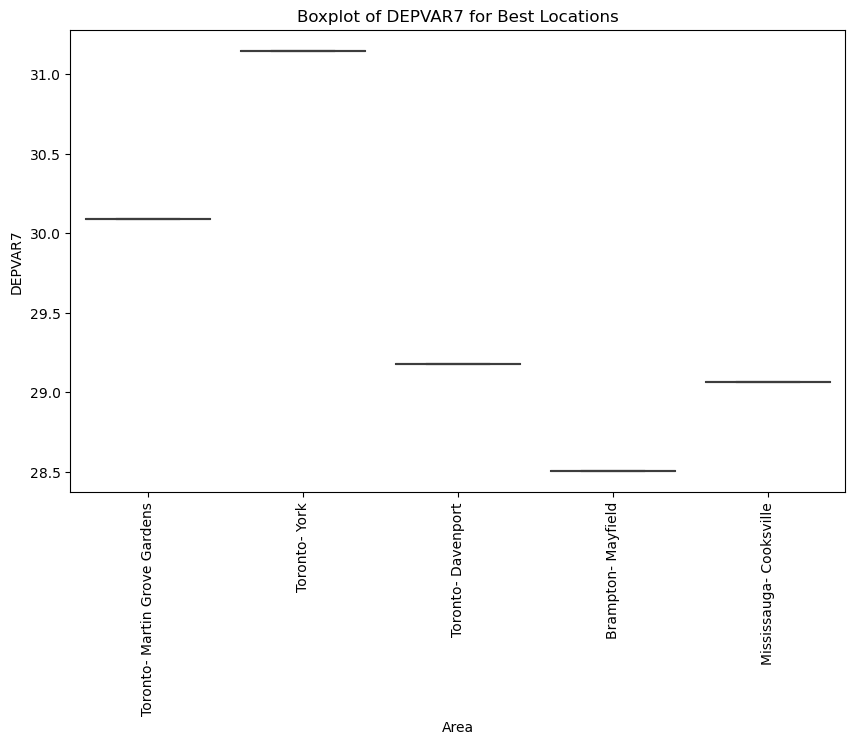

In [ ]:
# Filter the data to only include the best locations
best_locations_data = data[data['Area'].isin(PRCDDA_dict.values())]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Area', y='DEPVAR7', data=best_locations_data)
plt.title('Boxplot of DEPVAR7 for Best Locations')
plt.xlabel('Area')
plt.ylabel('DEPVAR7')
plt.xticks(rotation=90)
plt.show()

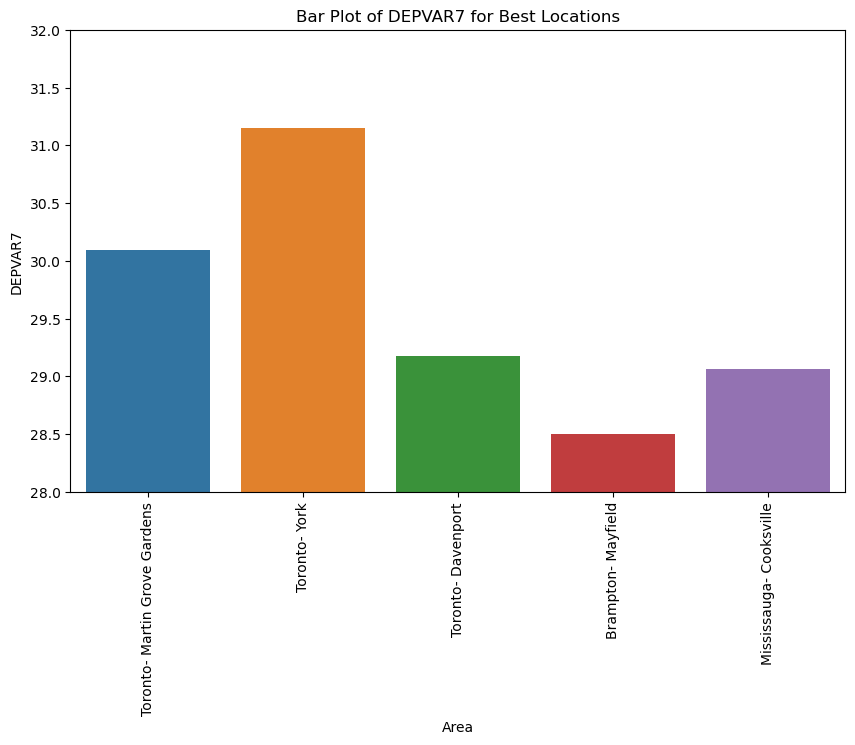

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y='DEPVAR7', data=best_locations_data)
plt.title('Bar Plot of DEPVAR7 for Best Locations')
plt.xlabel('Area')
plt.ylabel('DEPVAR7')
plt.ylim(28, 32)
plt.xticks(rotation=90)
plt.show()


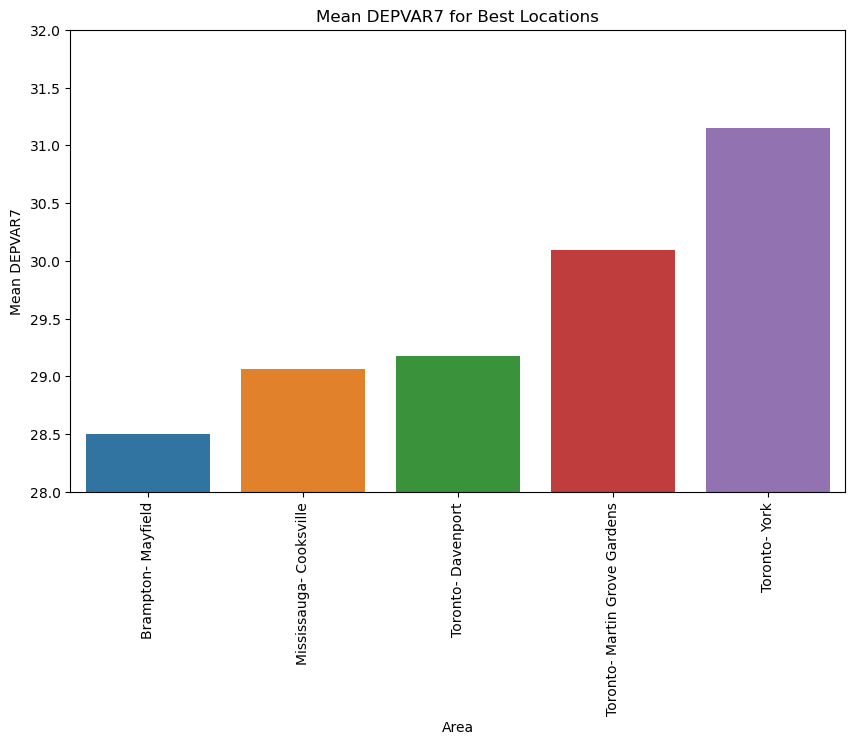

In [ ]:
grouped_data = best_locations_data.groupby('Area')['DEPVAR7'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y='DEPVAR7', data=grouped_data)
plt.title('Mean DEPVAR7 for Best Locations')
plt.xlabel('Area')
plt.ylabel('Mean DEPVAR7')
plt.ylim(28, 32)
plt.xticks(rotation=90)
plt.show()


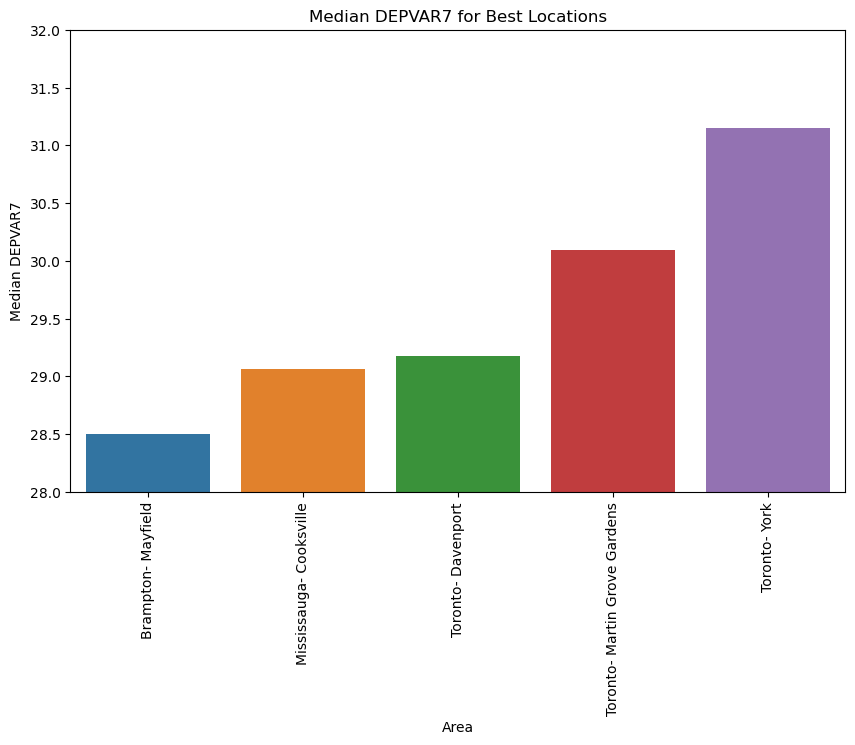

In [ ]:
grouped_data = best_locations_data.groupby('Area')['DEPVAR7'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y='DEPVAR7', data=grouped_data)
plt.title('Median DEPVAR7 for Best Locations')
plt.xlabel('Area')
plt.ylabel('Median DEPVAR7')
plt.ylim(28, 32)
plt.xticks(rotation=90)
plt.show()